In [241]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import skew

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler as MMS

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

import warnings 
warnings.filterwarnings(action= 'ignore')

In [242]:
df = pd.read_csv('train.csv')
display(df)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [243]:
df.shape

(1460, 81)

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

###  Missing values 

In [245]:
features_with_na = [features for features in df.columns if df[features].isnull().sum()>0]
print('Features having null values: {}'.format(len(features_with_na)))

for feature in features_with_na:
    print(feature,'-', np.round(df[feature].isnull().mean(),3)*100, '%')

Features having null values: 19
LotFrontage - 17.7 %
Alley - 93.8 %
MasVnrType - 0.5 %
MasVnrArea - 0.5 %
BsmtQual - 2.5 %
BsmtCond - 2.5 %
BsmtExposure - 2.6 %
BsmtFinType1 - 2.5 %
BsmtFinType2 - 2.6 %
Electrical - 0.1 %
FireplaceQu - 47.3 %
GarageType - 5.5 %
GarageYrBlt - 5.5 %
GarageFinish - 5.5 %
GarageQual - 5.5 %
GarageCond - 5.5 %
PoolQC - 99.5 %
Fence - 80.80000000000001 %
MiscFeature - 96.3 %


In [246]:
imp_features = []
for features in df.columns:
    if df[features].isnull().mean()>0.06:
        imp_features.append(features)
        
print(imp_features)

['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


### Relation b/w Nan and non_Nan values.
* we take median instead of mean as we know this dataset contains outliers

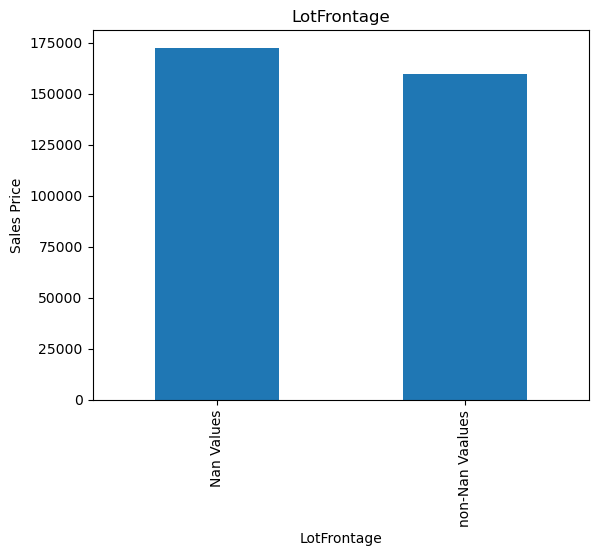

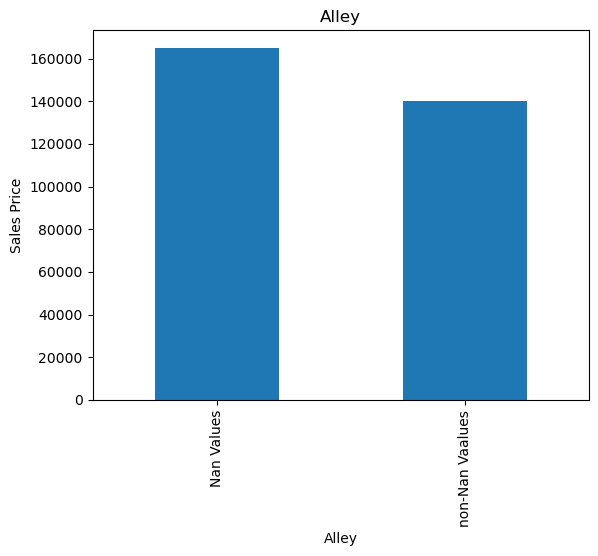

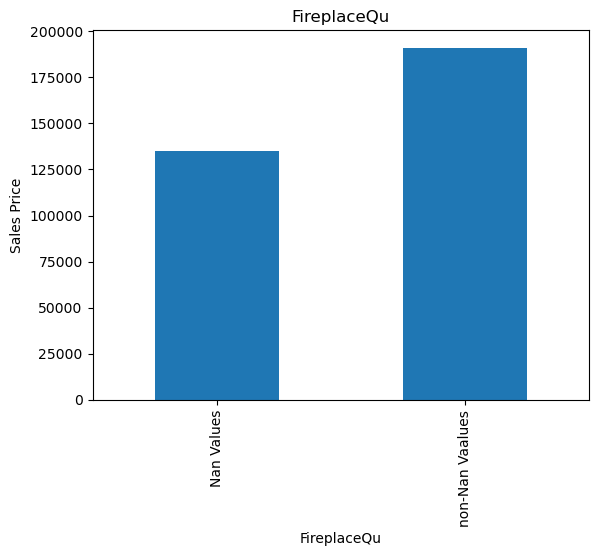

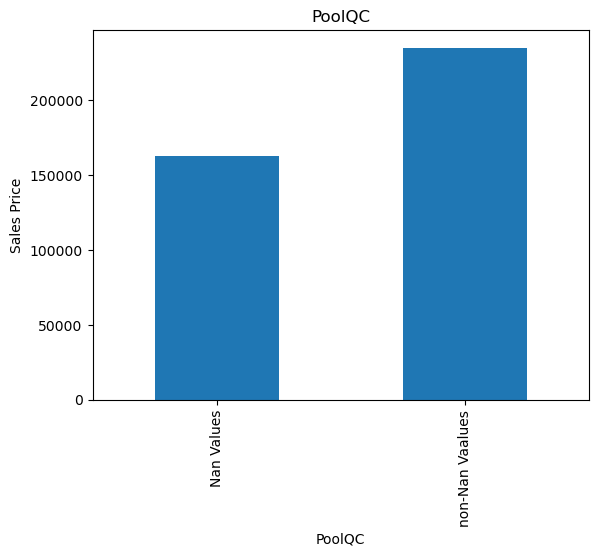

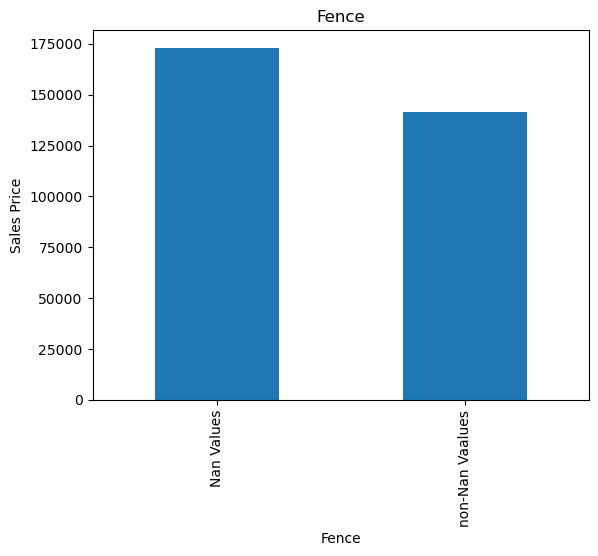

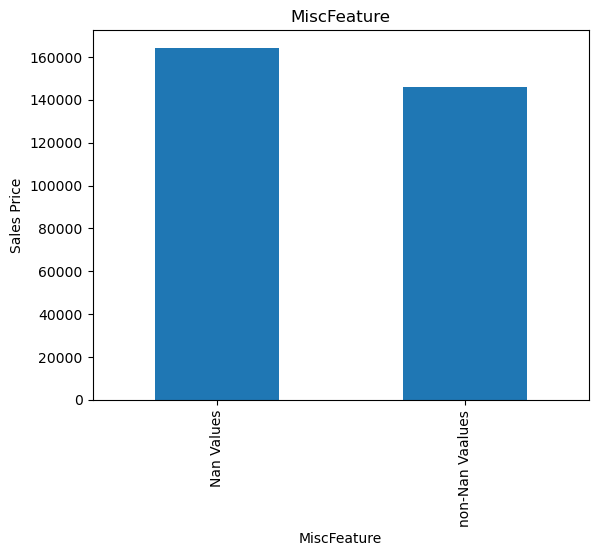

In [247]:
for feature in imp_features:
    df1=df.copy()
    df1[feature] = np.where(df1[feature].isnull(),'Nan Values','non-Nan Vaalues')
    
    #  plot mean SalesPrice for missing data
    df1.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.ylabel('Sales Price')
    plt.show()

### Numerical Variables

In [248]:
df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [249]:
num_features = [features for features in df.columns if df[features].dtypes !='O']
print('numerical varable: ', len(num_features) )

numerical varable:  38


In [250]:
yr_features = [feature for feature in num_features if 'Year'in feature or 'Yr' in feature]
yr_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

### Visulaize different Years featutres

Text(0.5, 1.0, 'yr_sold vs Sale_price')

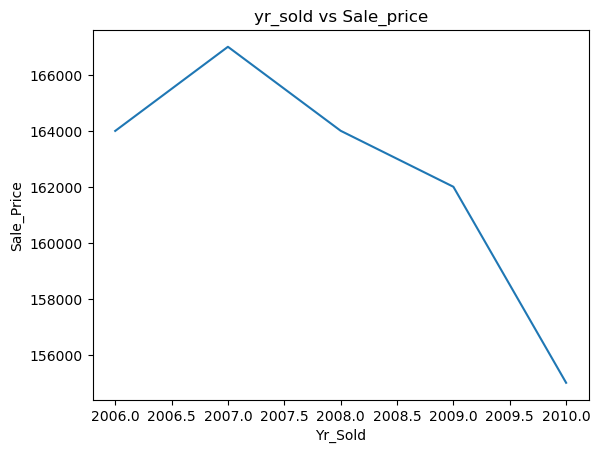

In [251]:
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Yr_Sold')
plt.ylabel('Sale_Price')
plt.title('yr_sold vs Sale_price')


* House_price is `decreasing` as year is increasing; that's wierd.
* let's see other year *features*

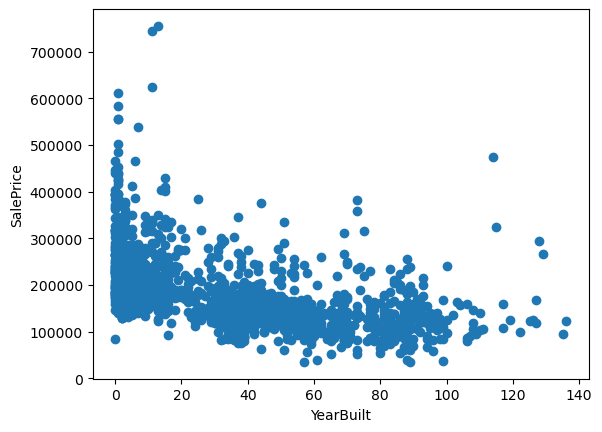

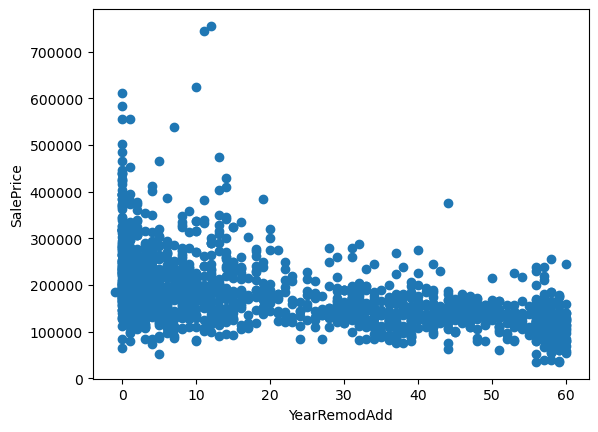

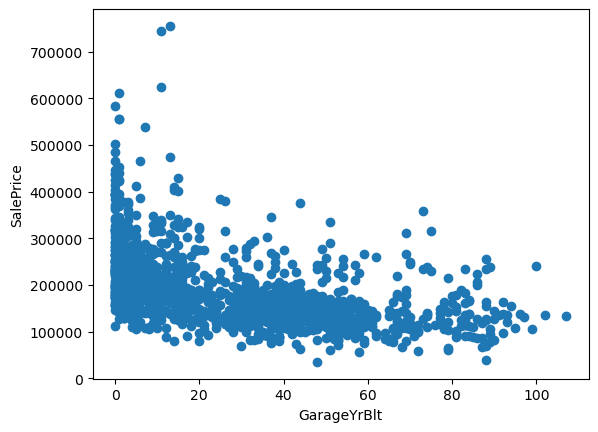

In [252]:
for feature in yr_features:
    if feature != 'YrSold':
        df1=df.copy()

        # We calculate no. of yrs of variable before year_sold    
        df1[feature] = df1['YrSold'] - df1[feature] 
        plt.scatter(df1[feature],df1['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()


### Differentiating numerical variables into discrete variables and continuous variables

In [253]:
discrete_features = [feature for feature in num_features if len(df[feature].unique())<25 and feature not in yr_features+['Id']]
continuous_features = [feature for feature in num_features if len(df[feature].unique())>=25 and feature not in yr_features+['Id']]

print('Total numerical variables: ', len(num_features))
print('discrete variables: ', len(discrete_features))
print('continuous variables:', len(continuous_features))
print('year features: ', len(yr_features))

Total numerical variables:  38
discrete variables:  17
continuous variables: 16
year features:  4


#### see relation between discrete features and SalePrice

In [254]:
print(discrete_features)

['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']


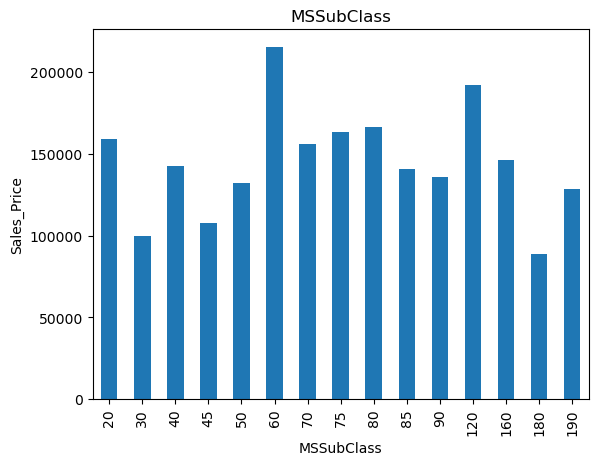

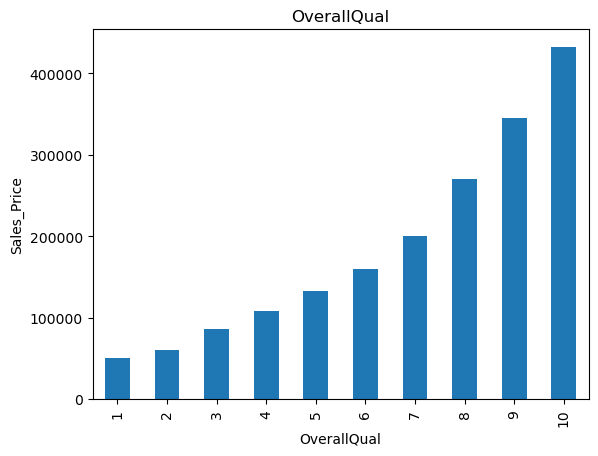

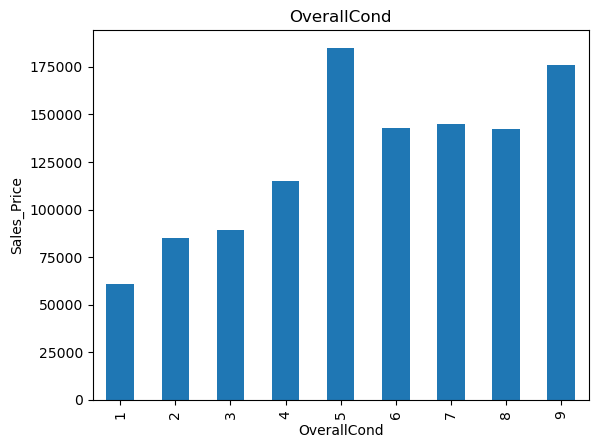

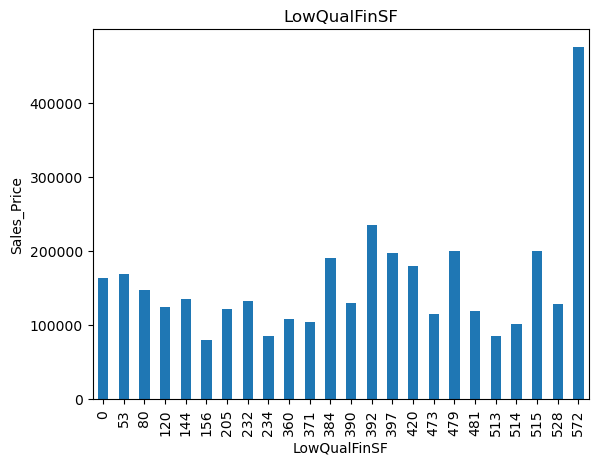

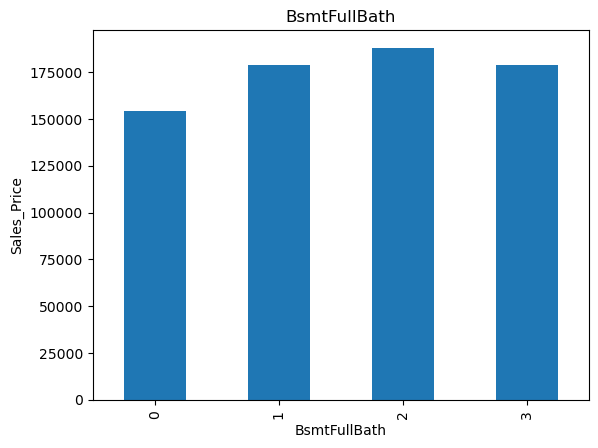

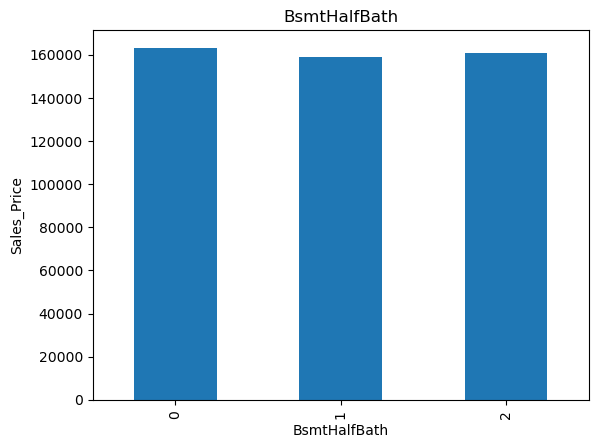

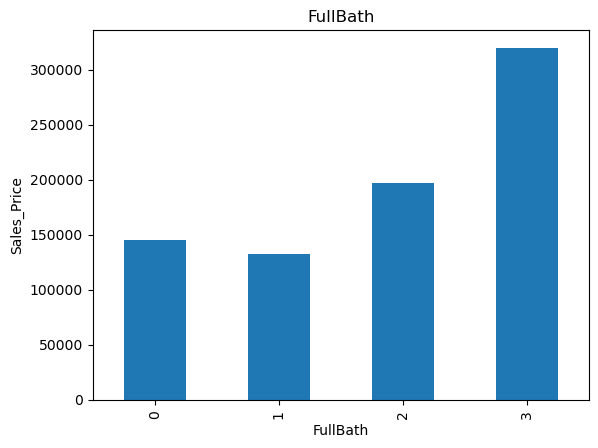

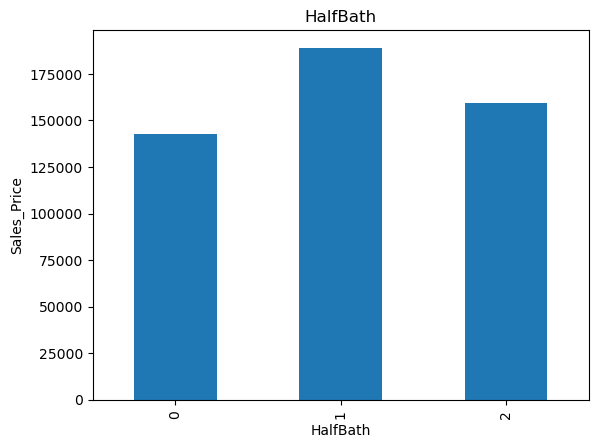

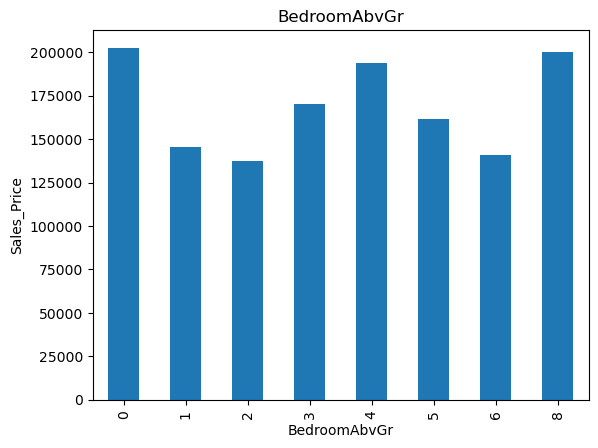

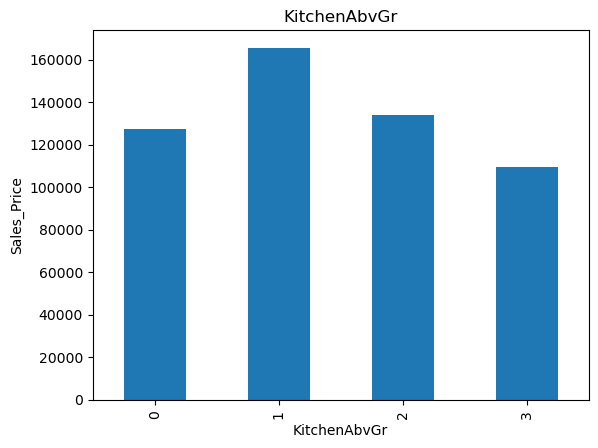

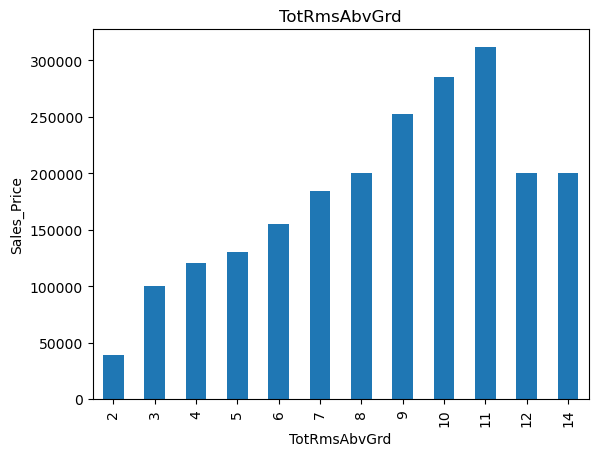

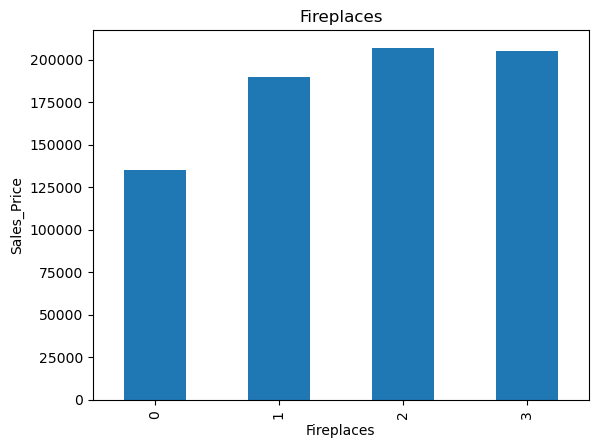

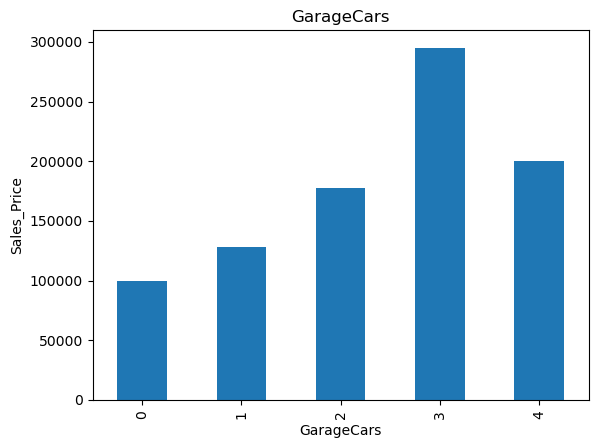

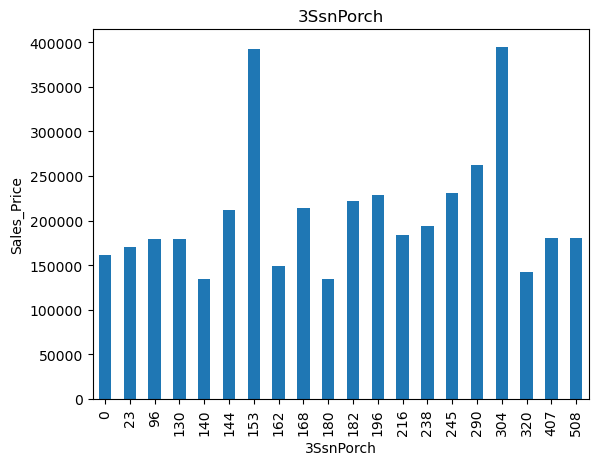

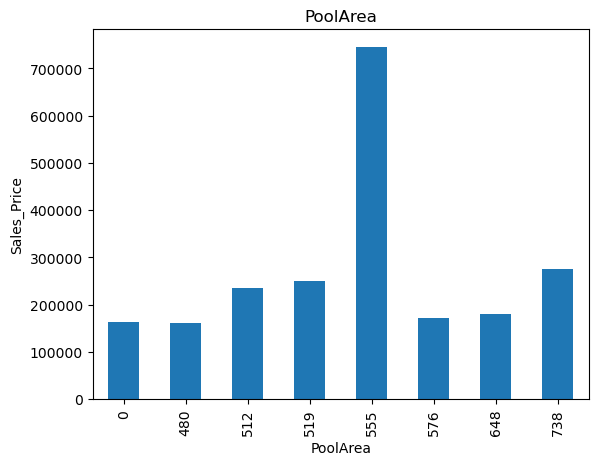

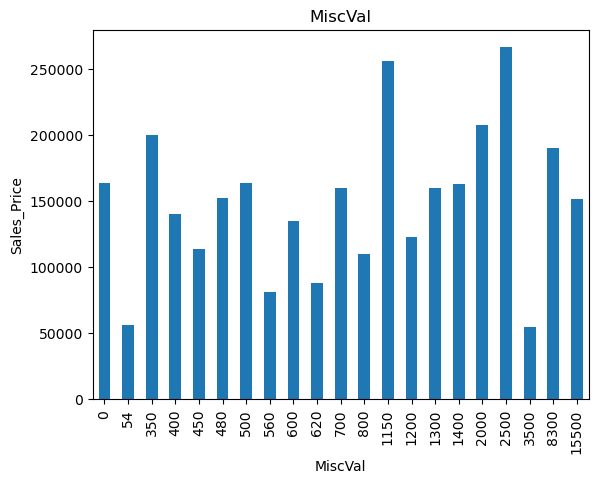

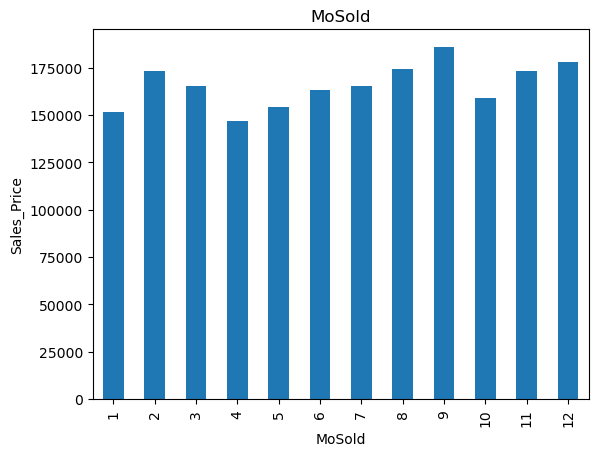

In [255]:
for index,feature in enumerate(discrete_features):
    df1=df.copy()
#     plt.subplots(row,cols,position(starts from 1))

    df1.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Sales_Price')
    plt.title(feature)
    plt.show()

* We can see there are some features that are related with Sales Price

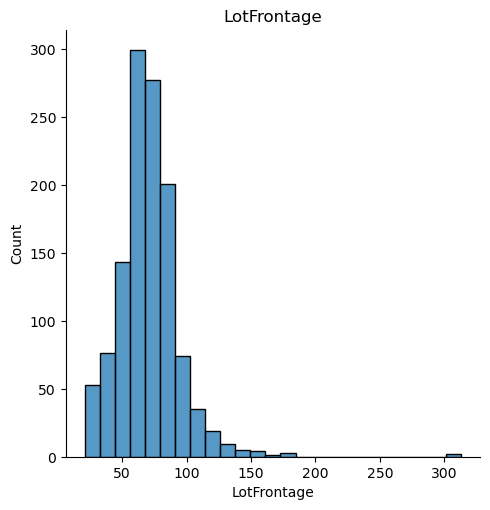

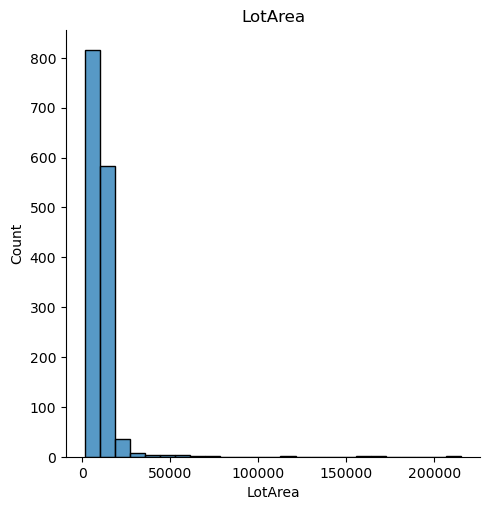

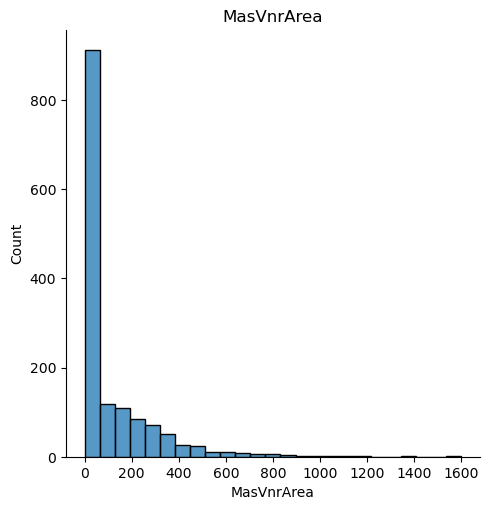

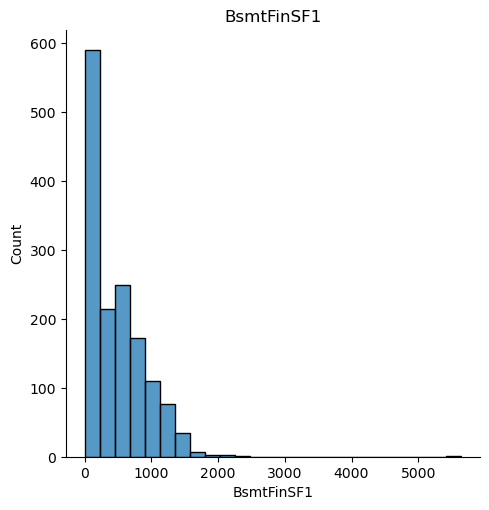

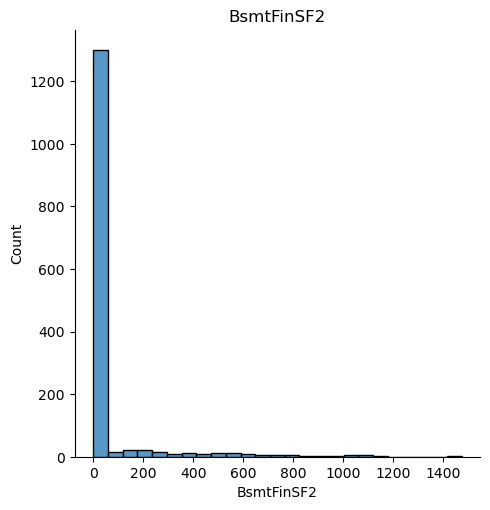

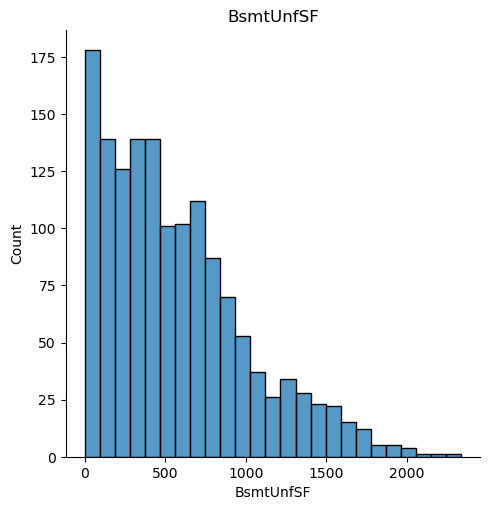

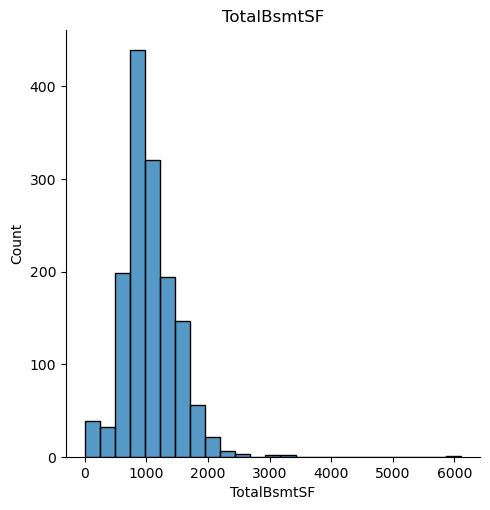

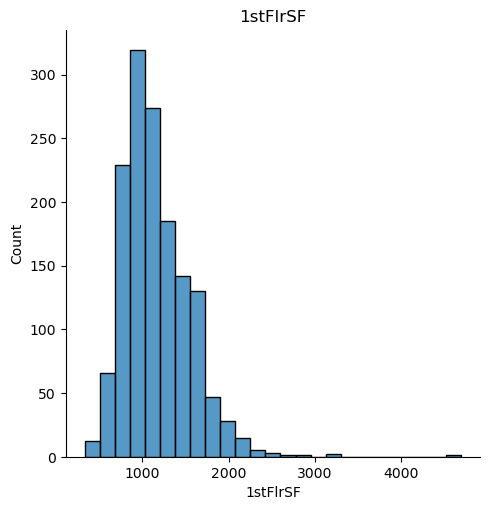

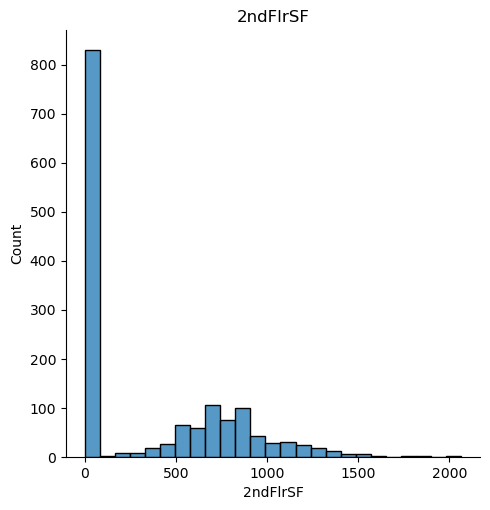

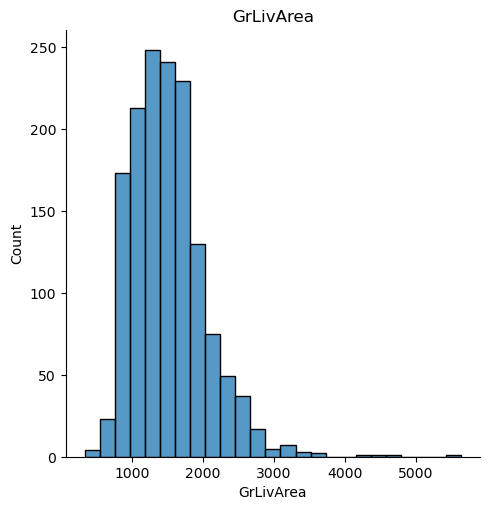

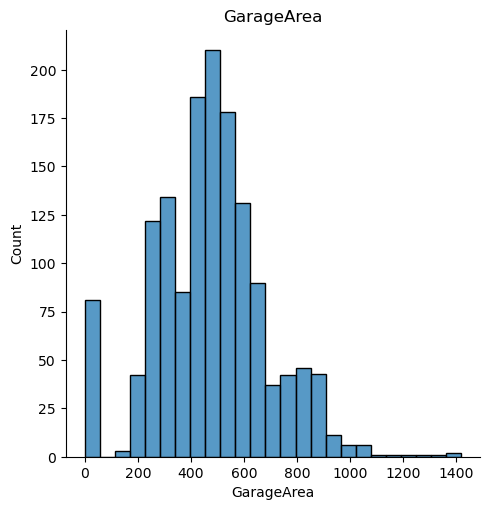

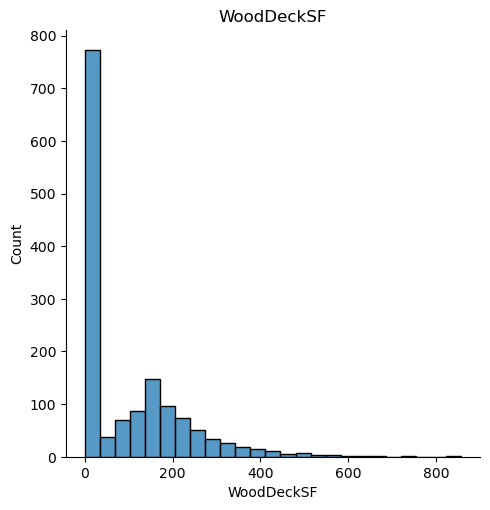

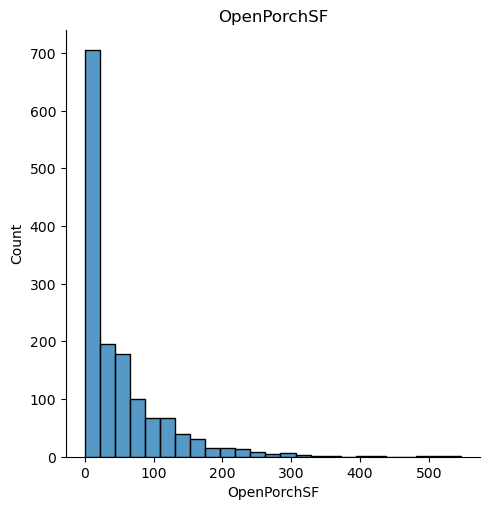

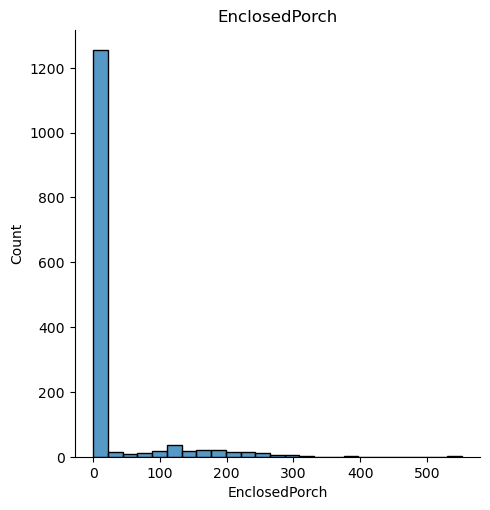

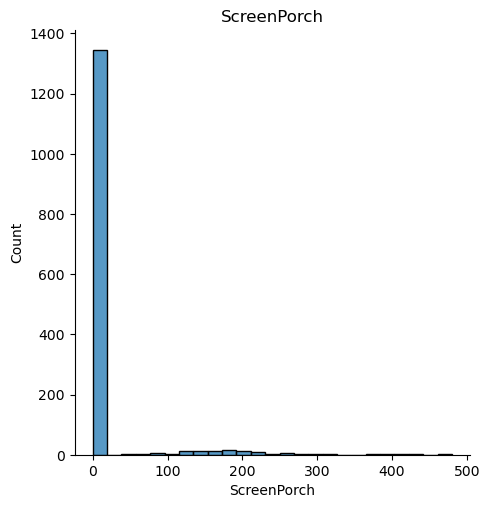

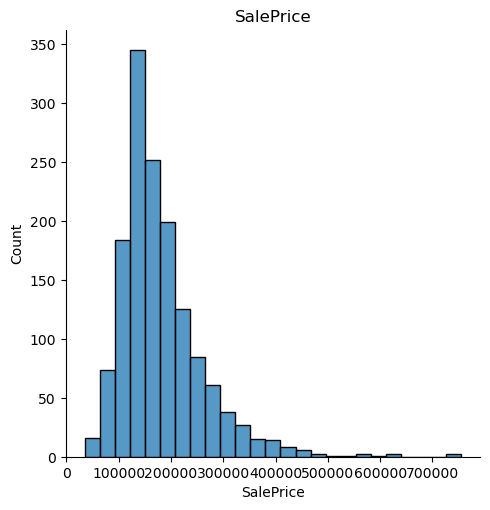

In [256]:
for feature in continuous_features:
    df1=df.copy()
    sns.displot(df[feature],bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

* Majority of continuous features does not possess gausian distribution. Let's apply some transformation on that features.

## Transforming Variables 

#### will be using Logarithmic transformation

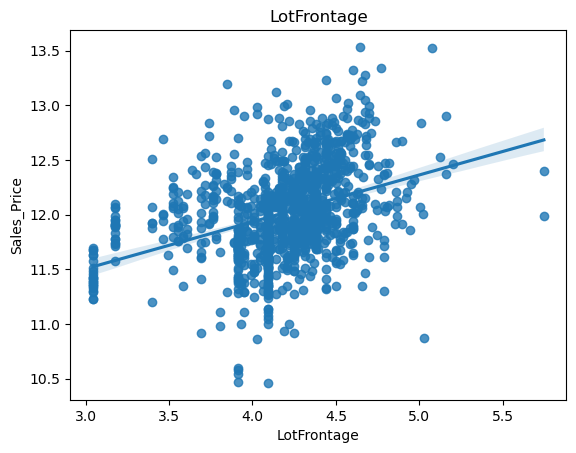

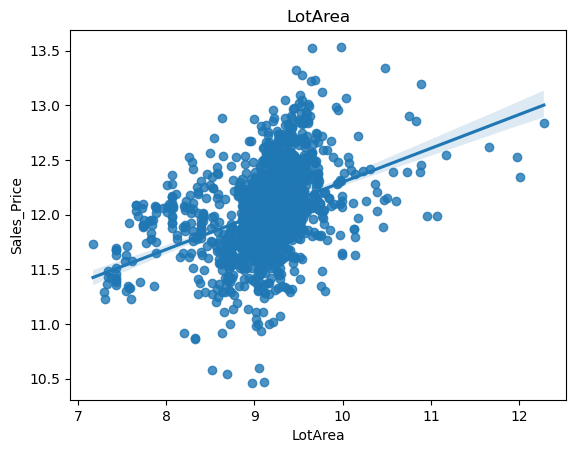

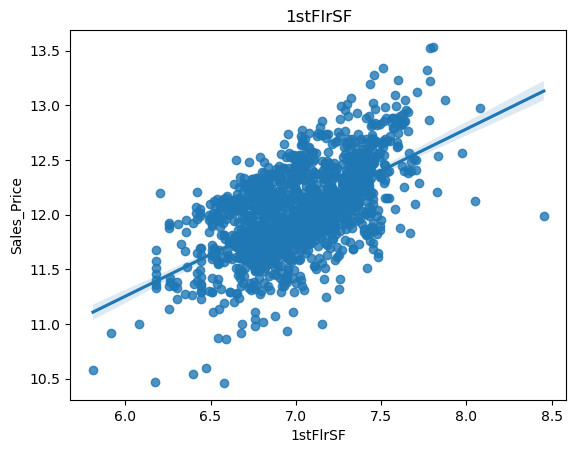

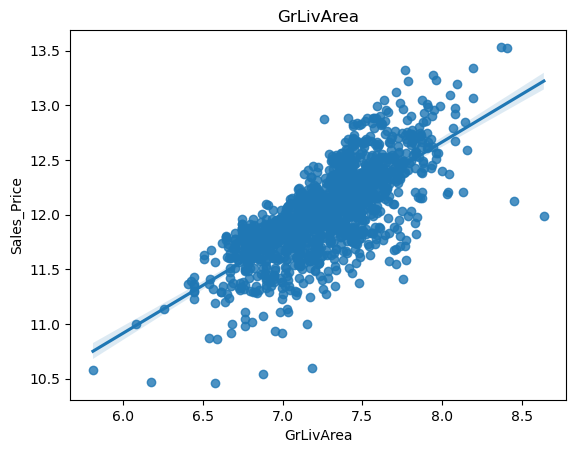

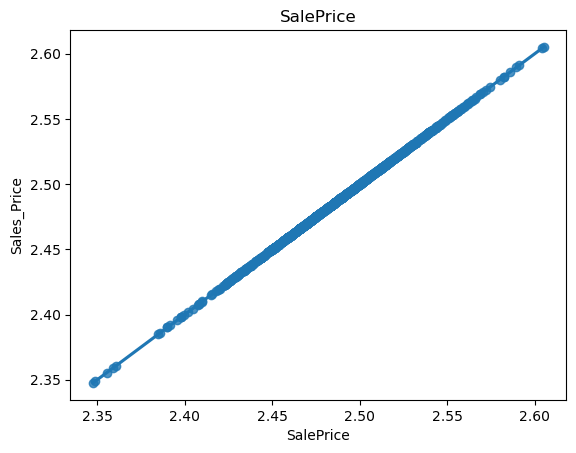

In [257]:
for feature in continuous_features:
    df1=df.copy()
    if 0 in df1[feature].unique():
        pass
    else:
        df1[feature] = np.log(df1[feature])
        df1['SalePrice'] = np.log(df1['SalePrice'])
        sns.regplot(data=df1,x=df1[feature],y=df1['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Sales_Price')
        plt.title(feature)
        plt.show()

## Outliers (only works for continuous features)

LotFrontage :  nan


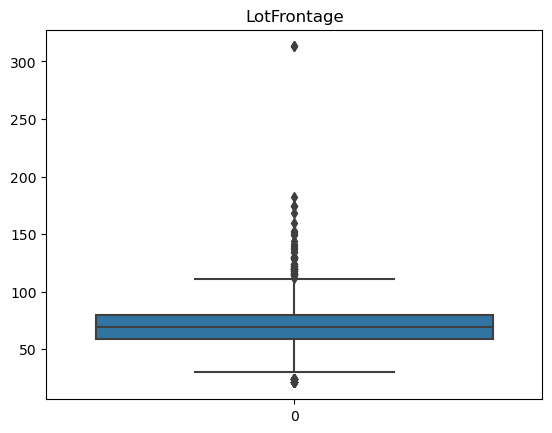

LotArea :  12.195142125084478


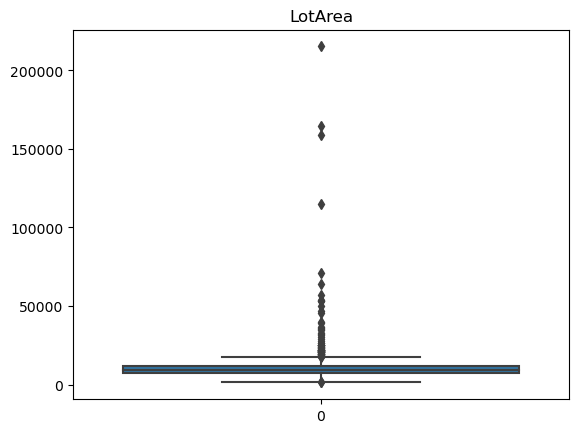

1stFlrSF :  1.3753417421837937


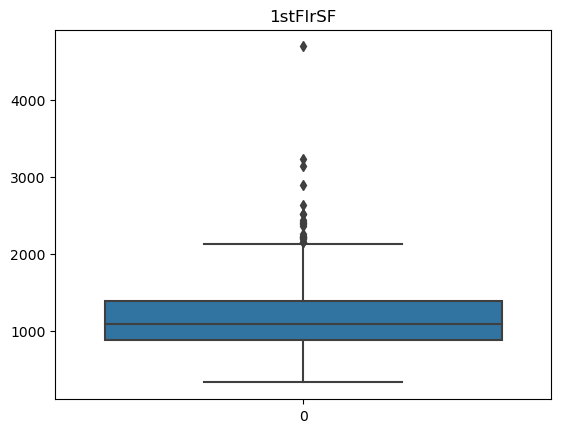

GrLivArea :  1.365155954773434


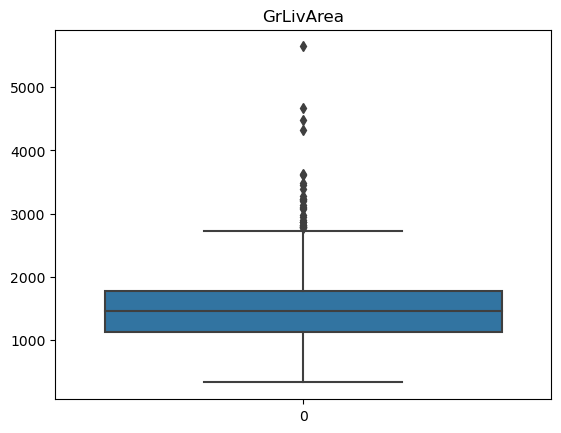

SalePrice :  1.880940746034036


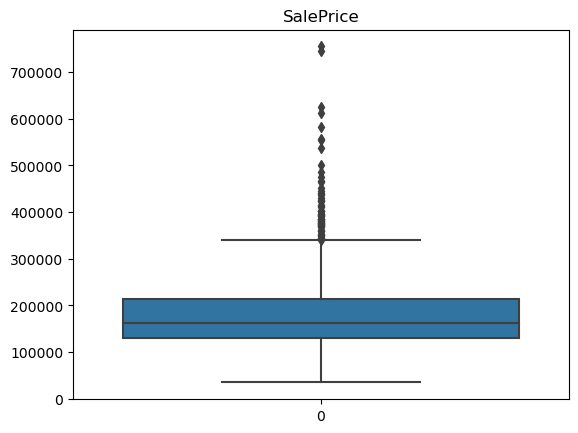

In [258]:
from scipy.stats import skew

skewed = []
for feature in continuous_features:
    df1=df.copy()
    if 0 in df1[feature].unique():
        pass
    else:
        df1[feature] = np.log(df1[feature])
        sns.boxplot(df[feature])
        print(feature,': ', skew(df[feature]))
        skewed.append(skew(df[feature])) 
        plt.title(feature)
        plt.show()

## Handling Outliers

* LotFrontage is normally distributed --> outliers are (mean + 3SD)
* LotArea,1stFlrSF,GrLivArea are Skewed --> outliers are out of IQR


#### Handling Outliers for LotFrontage (Normally distributed)

In [259]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [260]:
uppper_boundary=df['LotFrontage'].mean() + 3* df['LotFrontage'].std()
lower_boundary=df['LotFrontage'].mean() - 3* df['LotFrontage'].std()
print(lower_boundary), print(uppper_boundary),print(df['LotFrontage'].mean())


-2.804296955422899
142.9042136914762
70.04995836802665


(None, None, None)

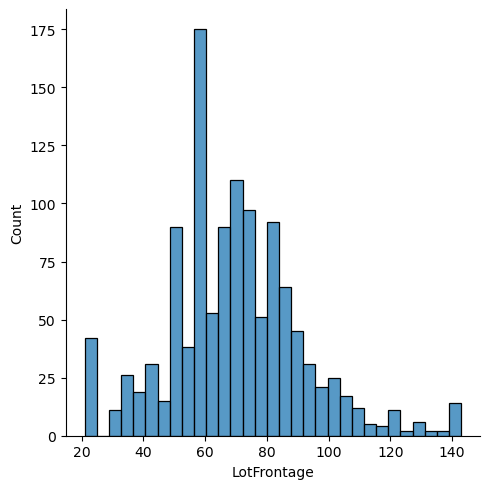

In [261]:
df.loc[df['LotFrontage']>uppper_boundary,'LotFrontage']=uppper_boundary
sns.displot(df['LotFrontage'])

#### Handling Outliers for LotArea (skewed)

In [262]:
df['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [263]:
IQR=df.LotArea.quantile(0.75)-df.LotArea.quantile(0.25)

lower_bridge=df['LotArea'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['LotArea'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

1481.5
17673.5


(None, None)

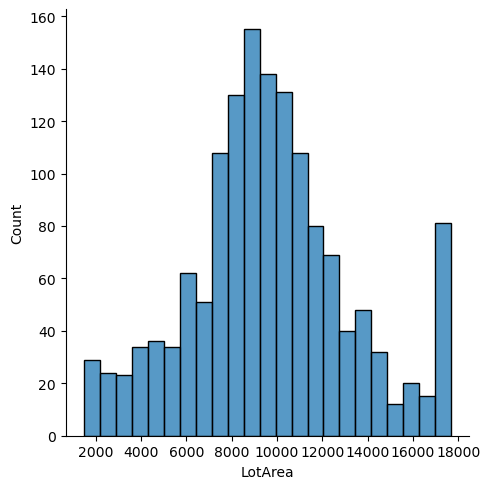

In [264]:
df.loc[df['LotArea']>upper_bridge,'LotArea']=upper_bridge
df.loc[df['LotArea']<lower_bridge,'LotArea']=upper_bridge
sns.displot(df['LotArea'])


#### Handling Outliers for 1stFlrSF (skewed)

In [265]:
df['1stFlrSF'].describe()

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64

In [266]:
IQR=df['1stFlrSF'].quantile(0.75)-df['1stFlrSF'].quantile(0.25)

lower_bridge=df['1stFlrSF'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['1stFlrSF'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

118.125
2155.125


(None, None)

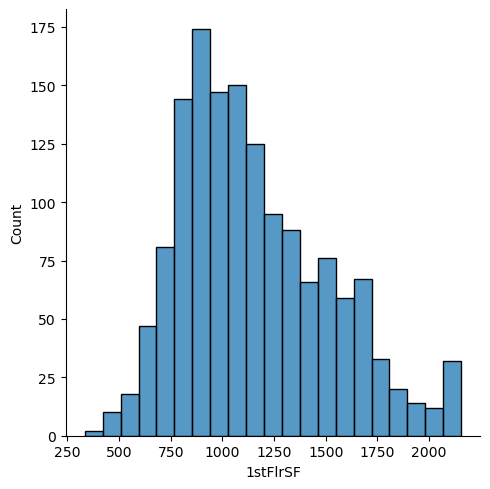

In [267]:
df.loc[df['1stFlrSF']>upper_bridge,'1stFlrSF']=upper_bridge
df.loc[df['1stFlrSF']<lower_bridge,'1stFlrSF']=upper_bridge
sns.displot(df['1stFlrSF'])

#### Handling Outliers for GrLivArea (skewed)


In [268]:
df['GrLivArea'].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

In [269]:
IQR=df['GrLivArea'].quantile(0.75)-df['GrLivArea'].quantile(0.25)

lower_bridge=df['GrLivArea'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['GrLivArea'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

158.625
2747.625


(None, None)

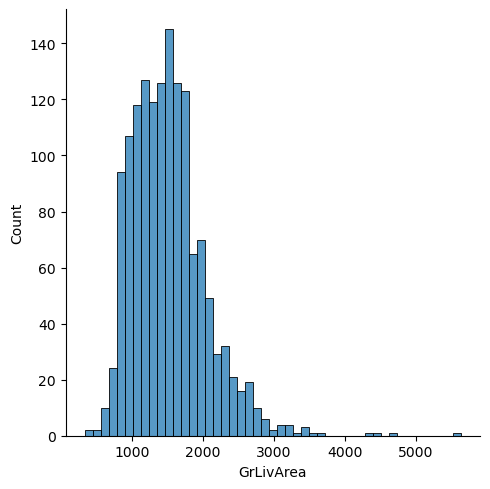

In [270]:
df.loc[df['GrLivArea']>upper_bridge,'1stFlrSF']=upper_bridge
df.loc[df['GrLivArea']<lower_bridge,'1stFlrSF']=upper_bridge
sns.displot(df['GrLivArea'])

# Categorical Variables


In [271]:
categorical_features = [features for features in df.columns if df[features].dtypes=='O']
len(categorical_features)

43

* First yo have to focus on cardinality of each categorical feature. means how many no. of category you have in that feature.

In [272]:
for feature in categorical_features:
    print(feature,': ',len(df[feature].unique()))

MSZoning :  5
Street :  2
Alley :  3
LotShape :  4
LandContour :  4
Utilities :  2
LotConfig :  5
LandSlope :  3
Neighborhood :  25
Condition1 :  9
Condition2 :  8
BldgType :  5
HouseStyle :  8
RoofStyle :  6
RoofMatl :  8
Exterior1st :  15
Exterior2nd :  16
MasVnrType :  5
ExterQual :  4
ExterCond :  5
Foundation :  6
BsmtQual :  5
BsmtCond :  5
BsmtExposure :  5
BsmtFinType1 :  7
BsmtFinType2 :  7
Heating :  6
HeatingQC :  5
CentralAir :  2
Electrical :  6
KitchenQual :  4
Functional :  7
FireplaceQu :  6
GarageType :  7
GarageFinish :  4
GarageQual :  6
GarageCond :  6
PavedDrive :  3
PoolQC :  4
Fence :  5
MiscFeature :  5
SaleType :  9
SaleCondition :  6


#### Realtion b/w categorical variables and dependent variable

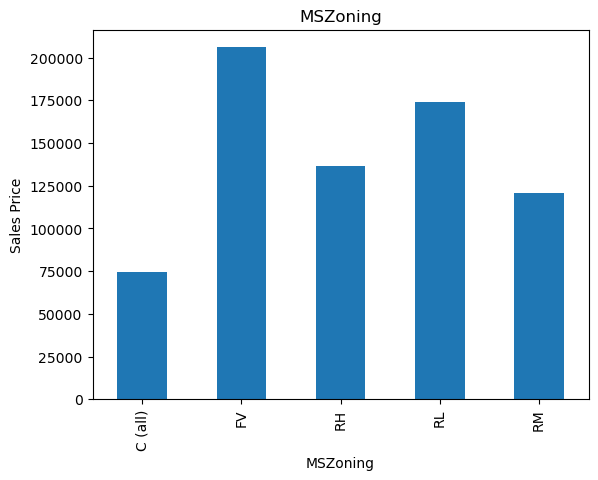

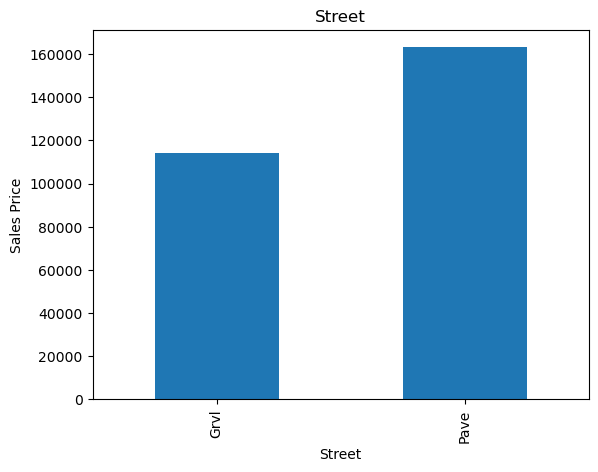

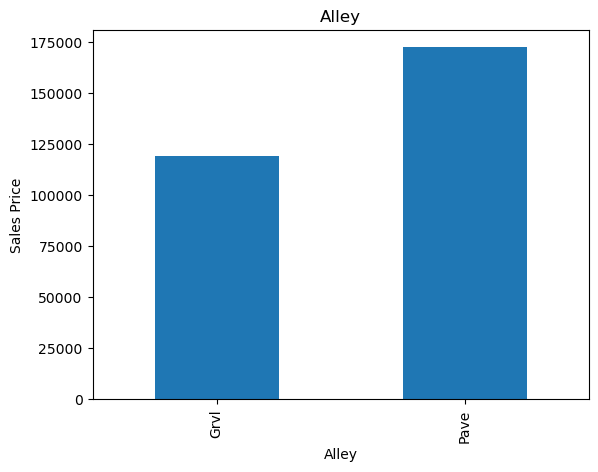

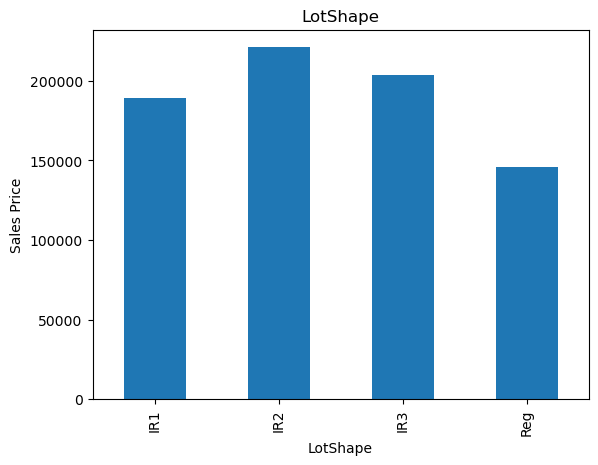

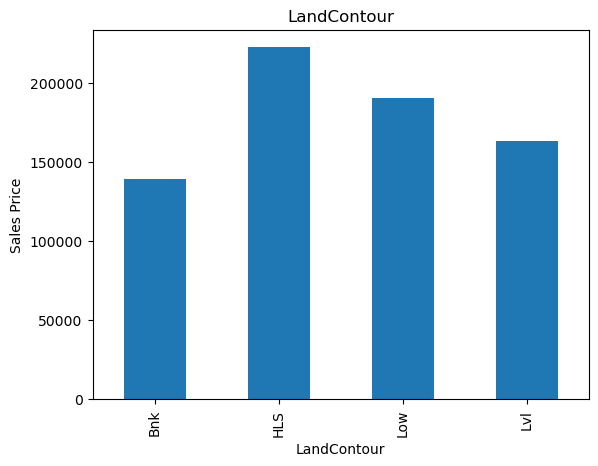

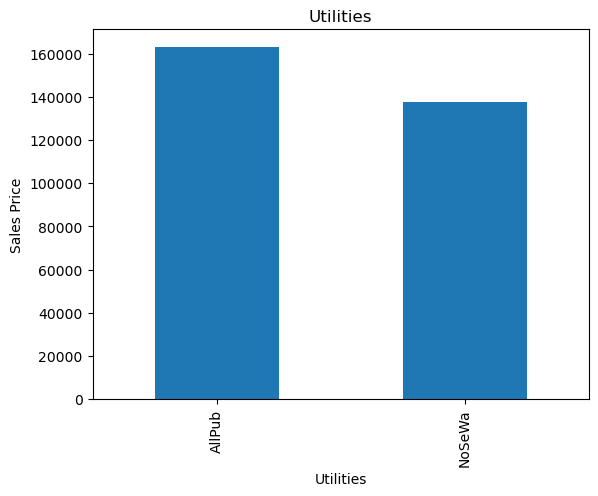

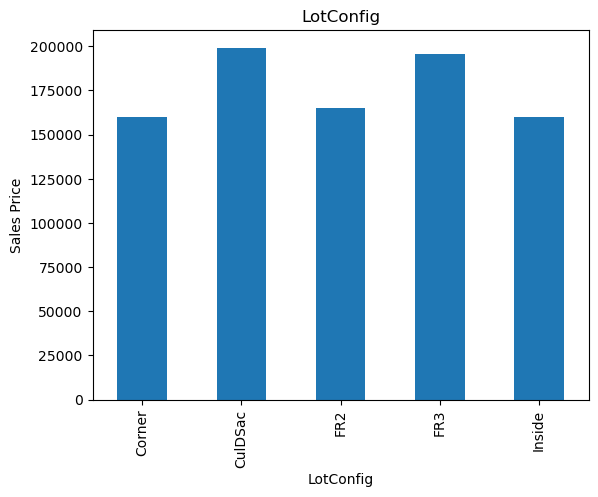

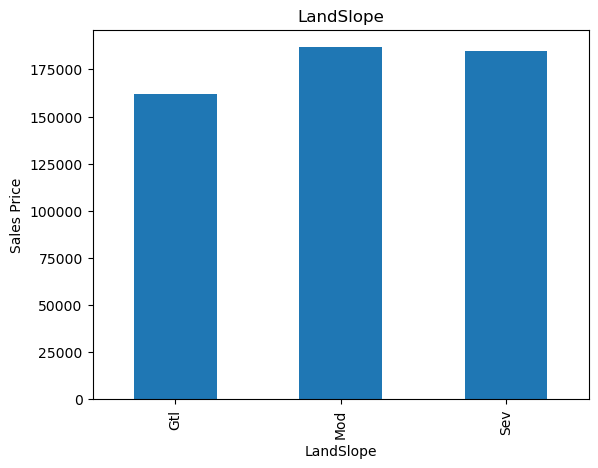

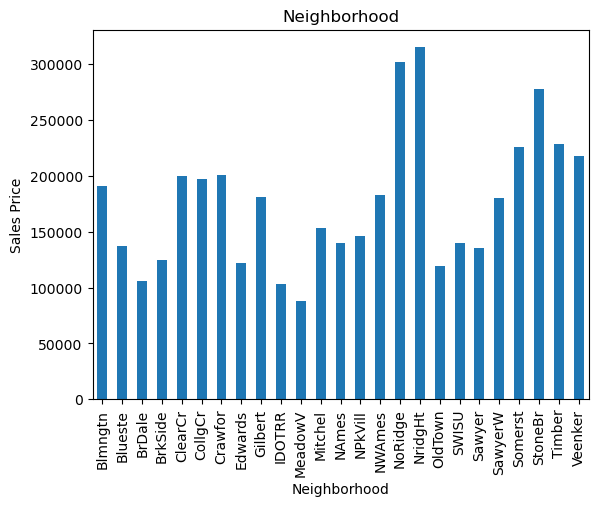

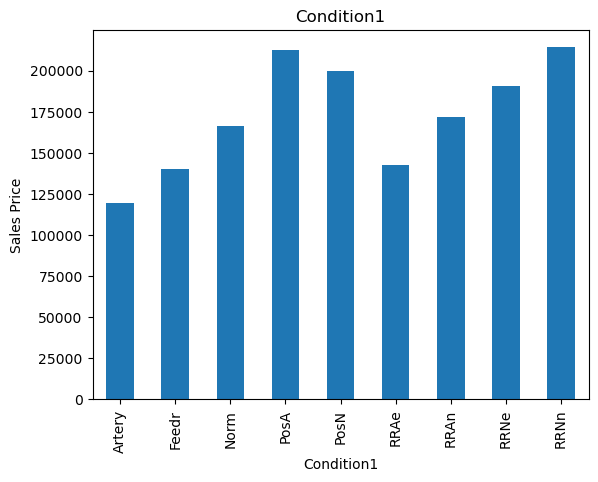

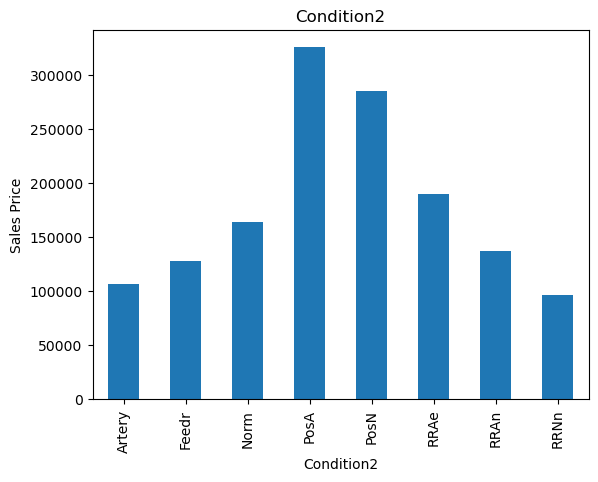

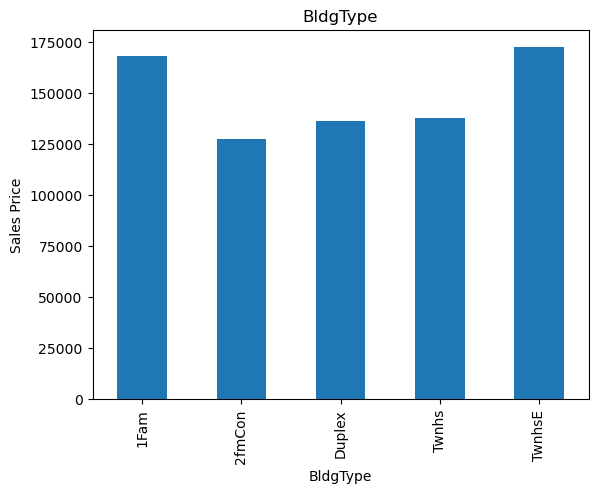

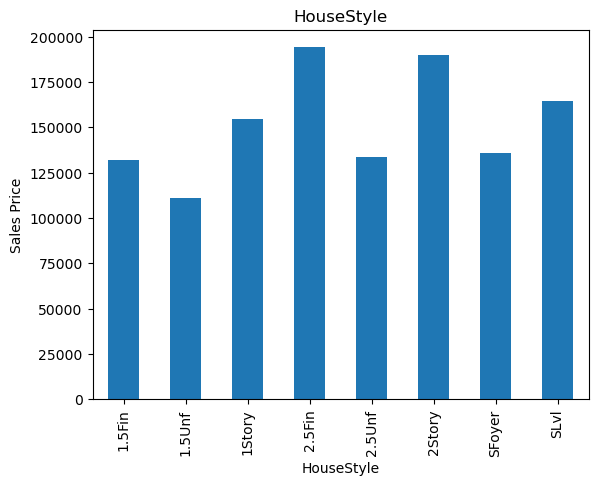

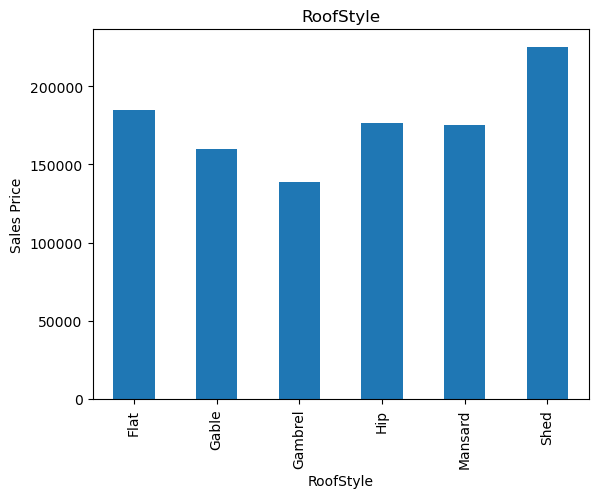

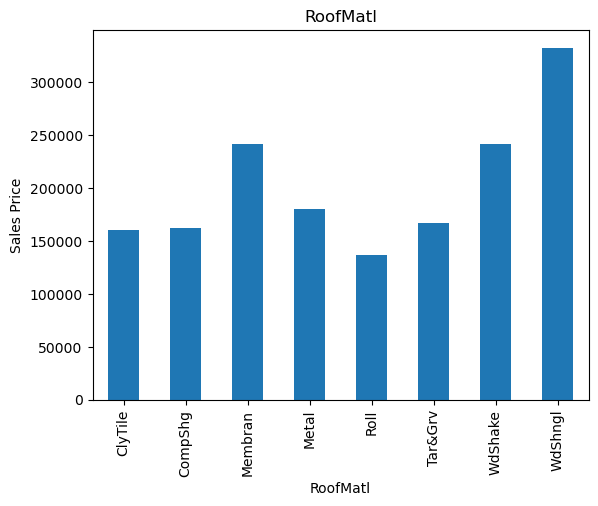

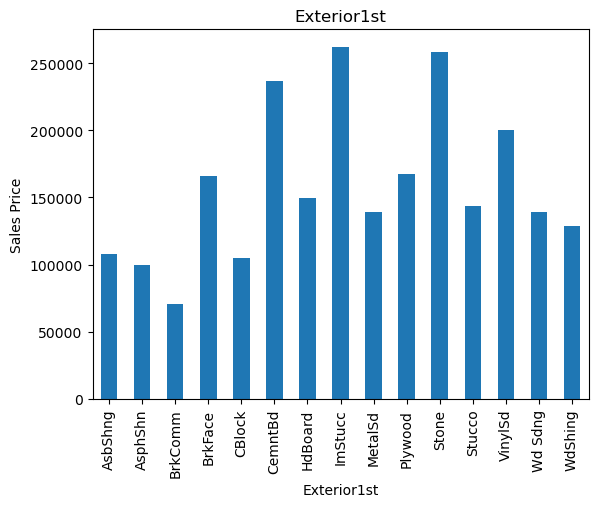

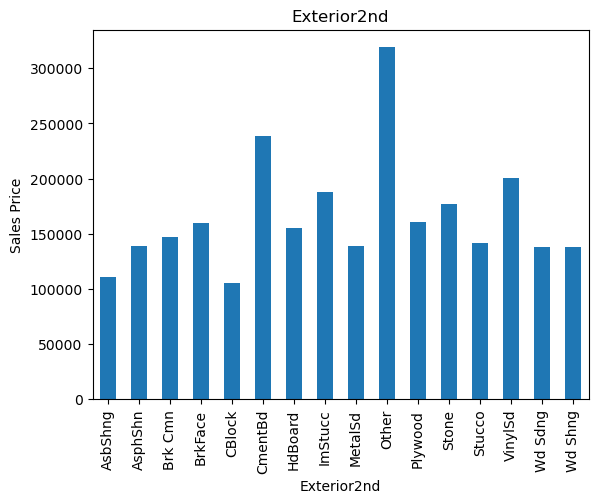

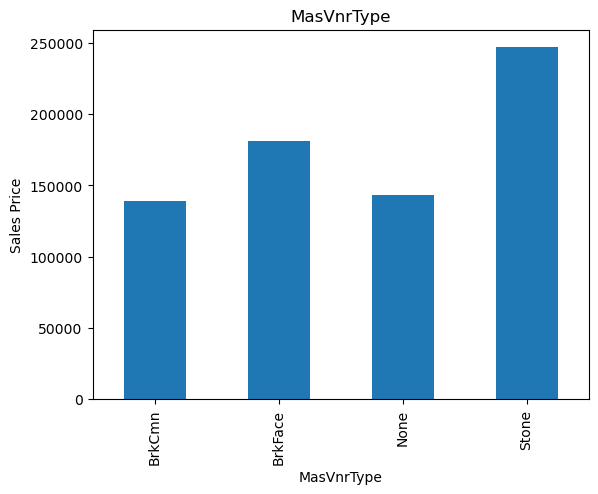

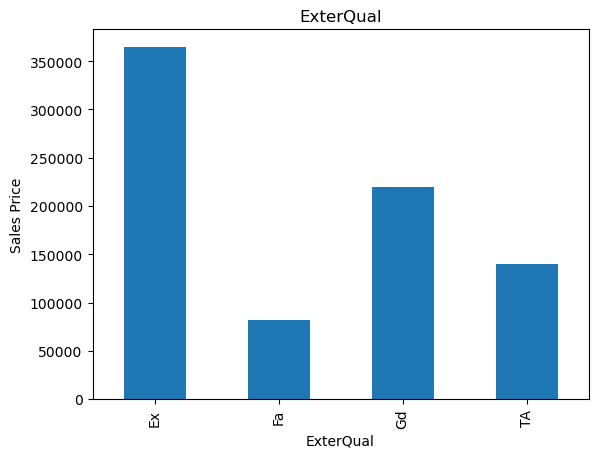

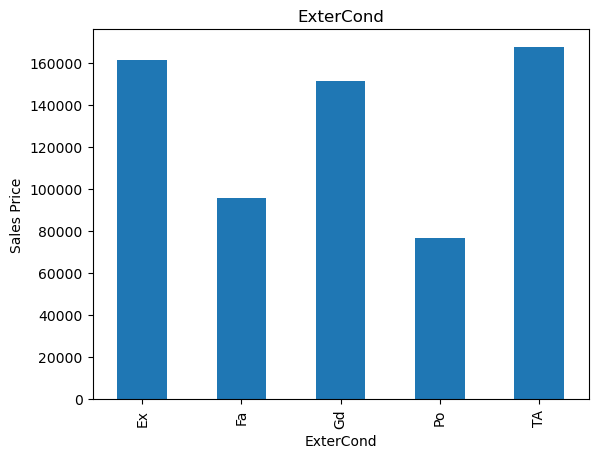

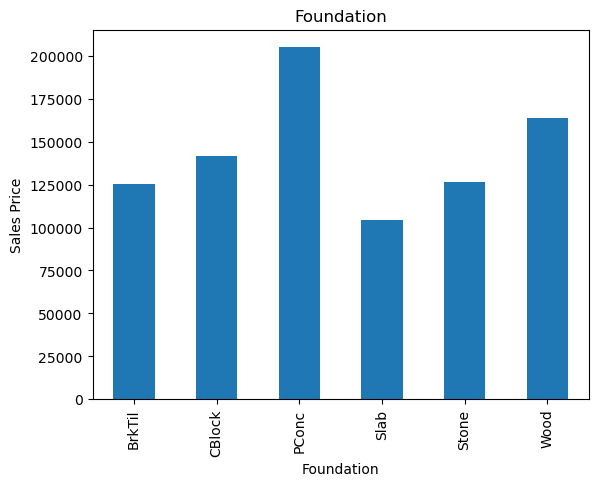

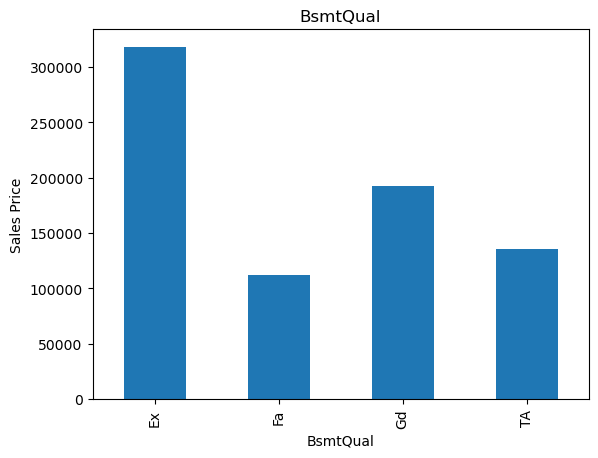

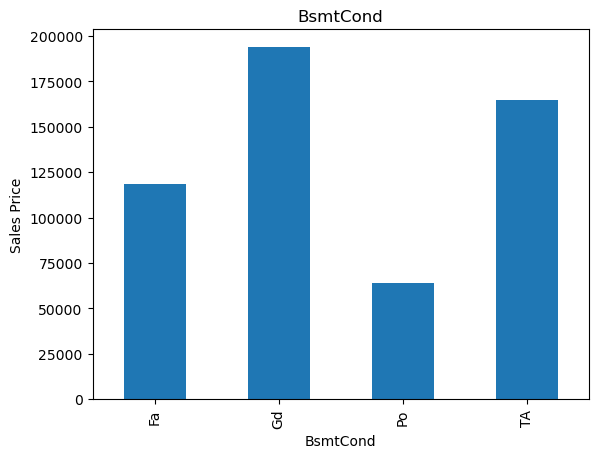

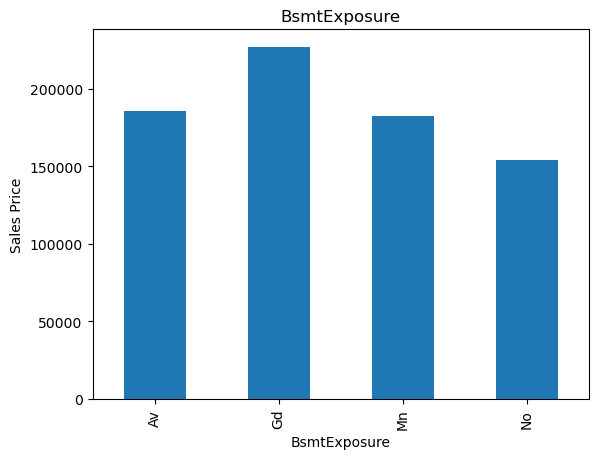

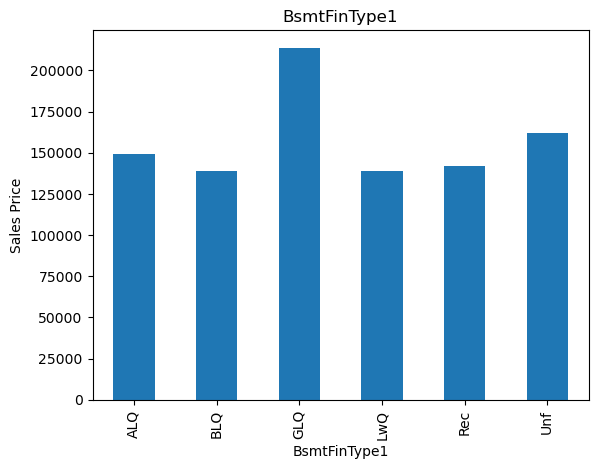

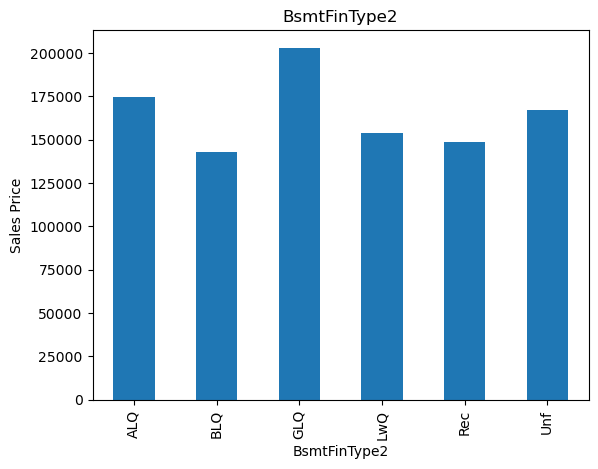

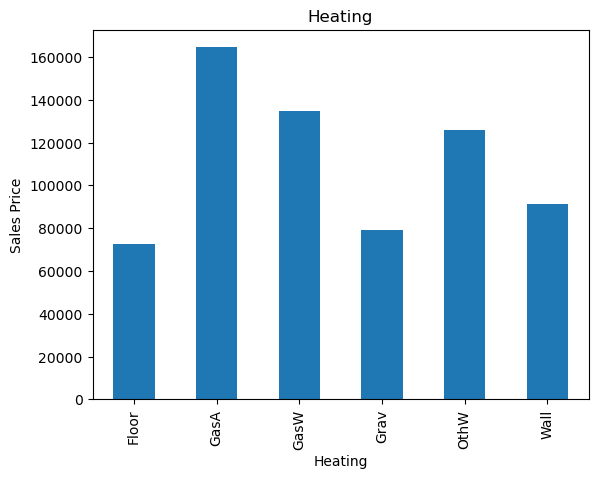

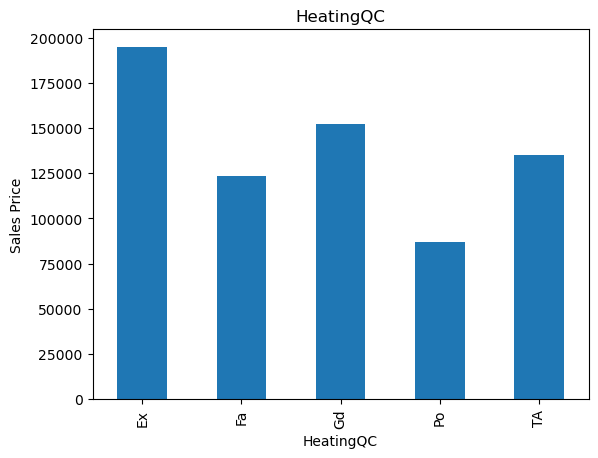

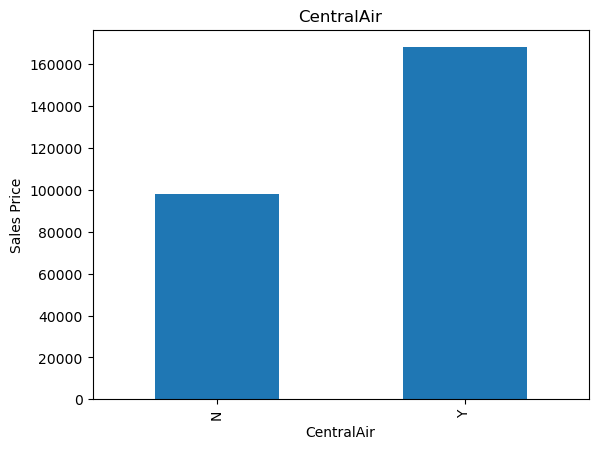

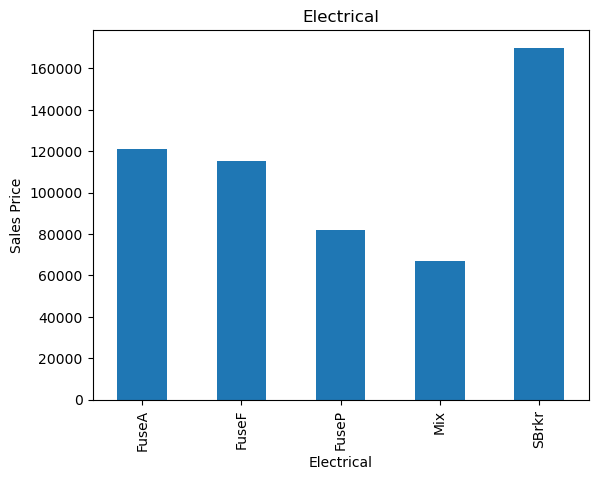

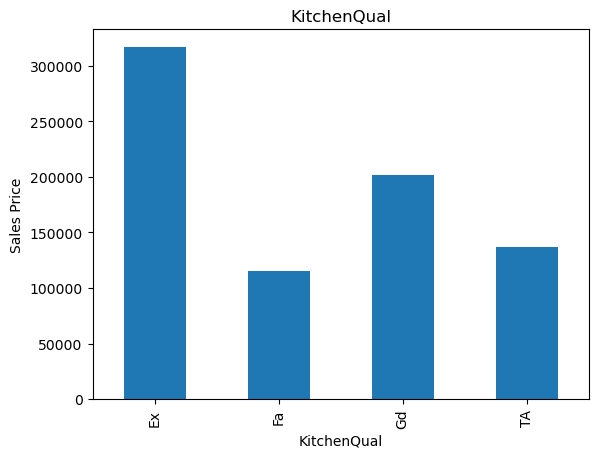

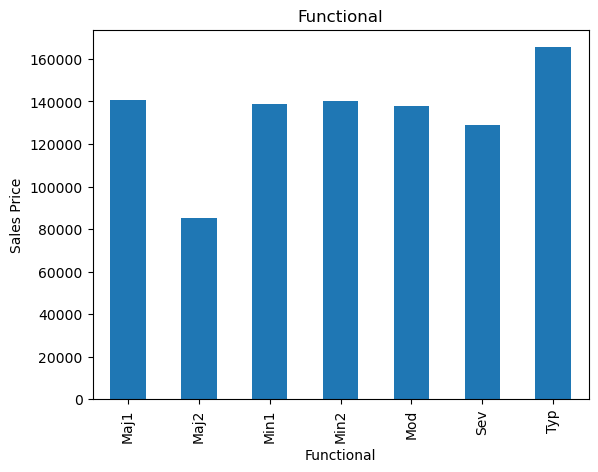

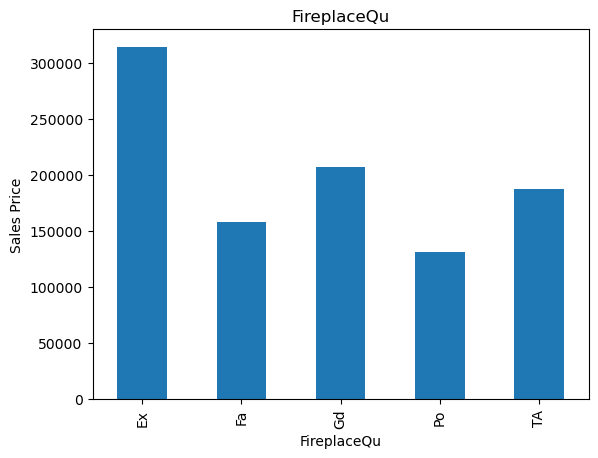

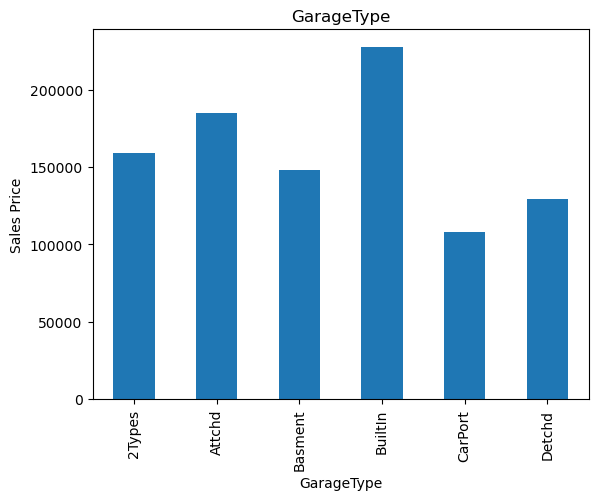

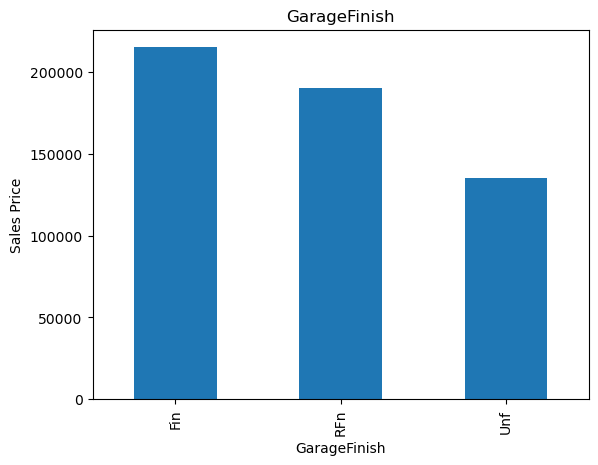

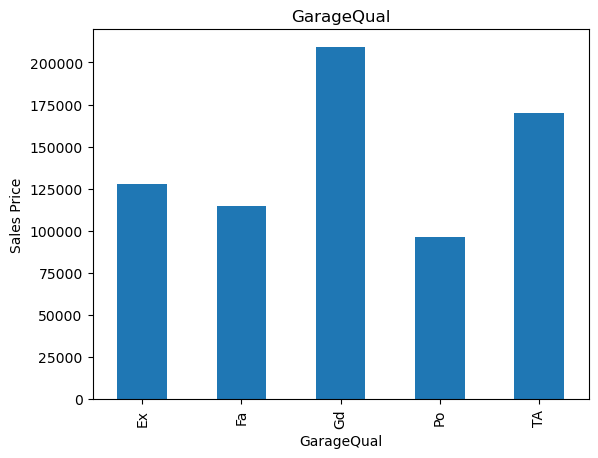

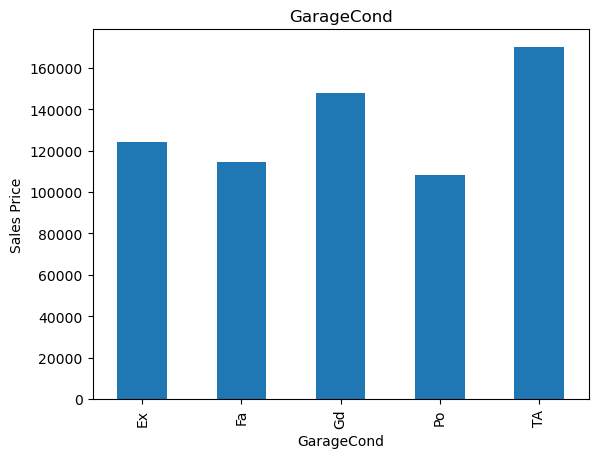

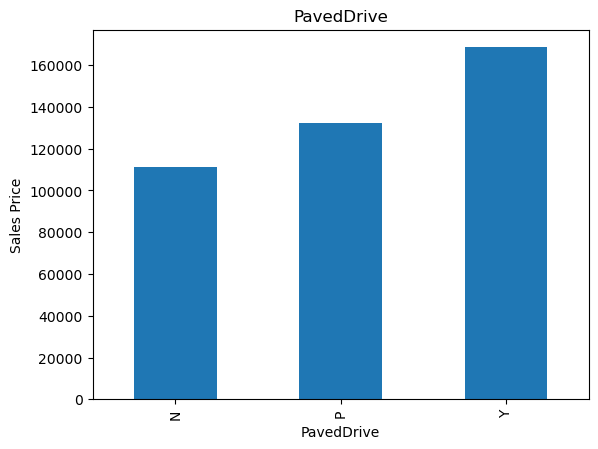

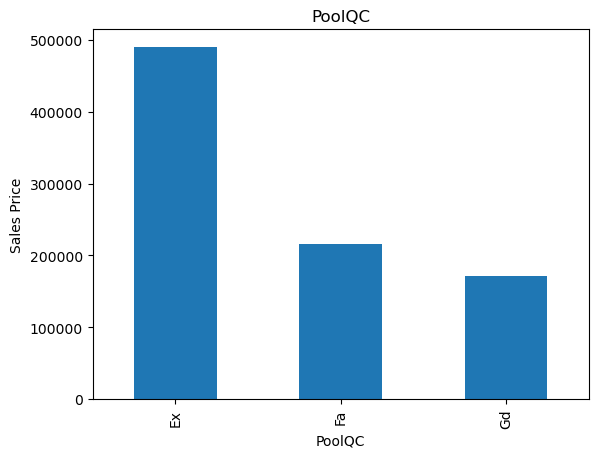

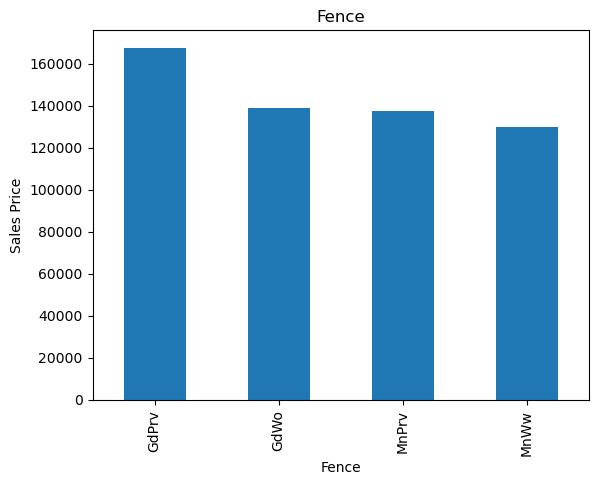

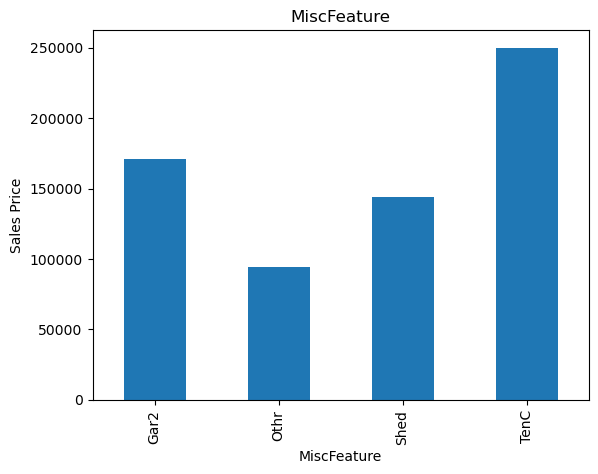

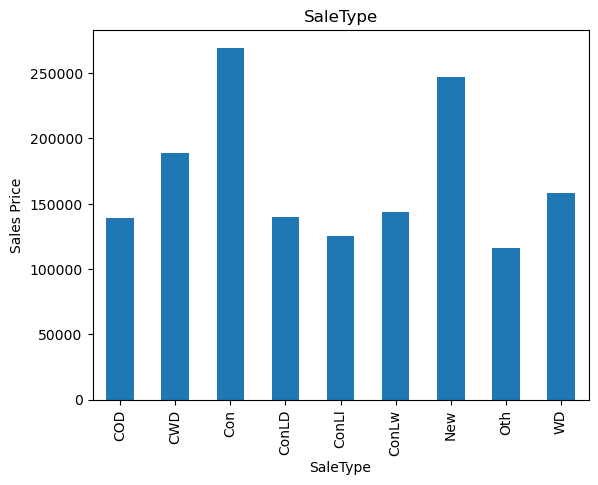

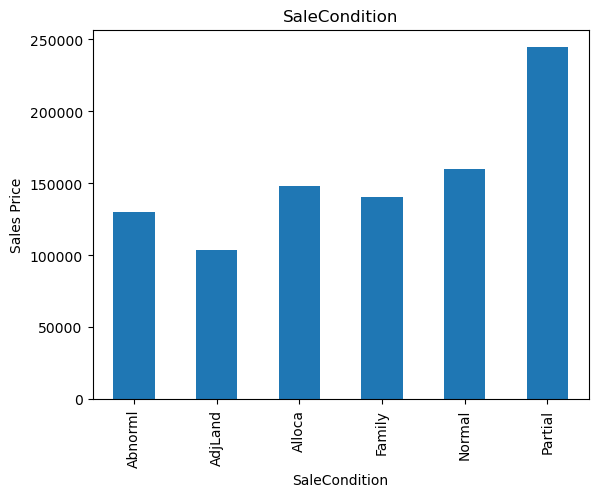

In [273]:
 for feature in categorical_features:
        df1=df.copy()
        df.groupby(feature)['SalePrice'].median().plot.bar()
        plt.xlabel(feature)
        plt.ylabel('Sales Price')
        plt.title(feature)
        plt.show()

# FEATURE ENGINEERING

In [274]:
df.shape

(1460, 81)

## Split data into train/test before applying feature engineering to avoid data leakage.
* first do feature engineering for train dataset and apply same procedure for test dataset

In [275]:
train,test = train_test_split(df,test_size=0.2,random_state=42)

In [276]:
train.shape, test.shape

((1168, 81), (292, 81))

# Feature Engineering for train dataset

## Handling missing Values
### 1. For categorical features

In [277]:
cat_nan_features = [feature for feature in train.columns if train[feature].dtypes=='O' and train[feature].isnull().sum()>0]
len(cat_nan_features)

16

In [278]:
for feature in cat_nan_features:
    print('{}: {}% missing values'.format(feature,np.round(train[feature].isnull().mean()*100,2)))


Alley: 93.66% missing values
MasVnrType: 0.51% missing values
BsmtQual: 2.4% missing values
BsmtCond: 2.4% missing values
BsmtExposure: 2.4% missing values
BsmtFinType1: 2.4% missing values
BsmtFinType2: 2.4% missing values
Electrical: 0.09% missing values
FireplaceQu: 46.83% missing values
GarageType: 5.48% missing values
GarageFinish: 5.48% missing values
GarageQual: 5.48% missing values
GarageCond: 5.48% missing values
PoolQC: 99.49% missing values
Fence: 80.05% missing values
MiscFeature: 96.06% missing values


In [279]:
def replace_missing(df,nan_features):
    data = df.copy()
    data[nan_features]=data[nan_features].fillna('missing')
    return data

In [280]:
train = replace_missing(train,cat_nan_features)
train[cat_nan_features].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [281]:
display(train[cat_nan_features])

,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
254,missing,None,TA,TA,No,Rec,Unf,SBrkr,missing,Attchd,RFn,TA,TA,missing,missing,missing
1066,missing,None,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,RFn,TA,TA,missing,missing,missing
638,missing,None,Fa,TA,No,Unf,Unf,FuseA,missing,missing,missing,missing,missing,missing,MnPrv,missing
799,missing,BrkFace,Gd,TA,No,ALQ,Unf,SBrkr,TA,Detchd,Unf,TA,TA,missing,MnPrv,missing
380,Pave,None,TA,TA,No,LwQ,Unf,SBrkr,Gd,Detchd,Unf,TA,TA,missing,missing,missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,missing,None,Gd,TA,No,GLQ,Unf,SBrkr,Gd,Attchd,RFn,TA,TA,missing,missing,missing
1130,missing,None,TA,TA,No,BLQ,Unf,SBrkr,TA,Detchd,Unf,TA,TA,missing,MnPrv,missing
1294,missing,None,TA,TA,No,Rec,Unf,SBrkr,missing,Detchd,Unf,TA,TA,missing,missing,missing
860,missing,None,TA,TA,No,Unf,Unf,SBrkr,Gd,Detchd,Unf,TA,TA,missing,GdPrv,missing


### 2. Handling missing values for numerical features

In [282]:
num_nan_features = [feature for feature in train.columns if train[feature].dtypes!='O' and train[feature].isnull().sum()>0]
len(num_nan_features)

3

In [283]:
for feature in num_nan_features:
    print('{}: {}% missing values'.format(feature,np.round(train[feature].isnull().mean()*100,2)))

LotFrontage: 18.58% missing values
MasVnrArea: 0.51% missing values
GarageYrBlt: 5.48% missing values


#### Creates new cols to capture nan value before replacing it with median/mode

In [284]:
median = {}

for feature in num_nan_features:
    median[feature] = train[feature].median()
    train[feature] = train[feature].fillna(median[feature])
    
train[num_nan_features].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [285]:
median

{'LotFrontage': 70.0, 'MasVnrArea': 0.0, 'GarageYrBlt': 1980.0}

In [286]:
display(train[num_nan_features])

,LotFrontage,MasVnrArea,GarageYrBlt
254,70.0,0.0,1957.0
1066,59.0,0.0,1993.0
638,67.0,0.0,1980.0
799,60.0,252.0,1939.0
380,50.0,0.0,1924.0
...,...,...,...
1095,78.0,0.0,2006.0
1130,65.0,0.0,1981.0
1294,60.0,0.0,1957.0
860,55.0,0.0,1925.0


### Handling Temporal Variables (date/time variables)

In [287]:
for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    train[feature] = train['YrSold']-train[feature]

In [288]:
train[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
254,53,53,53.0
1066,16,15,16.0
638,98,58,28.0
799,70,57,68.0
380,86,60,86.0


### Applying log normal distribution on skewed features

In [334]:
skewed_features = ['LotFrontage',  'LotArea',  '1stFlrSF', 'GrLivArea']

for feature in skewed_features:
    train[feature] = np.log(train[feature])

### Handling rare categorical features

In [290]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
254,255,20,RL,4.248495,9.035987,Pave,missing,Reg,Lvl,AllPub,...,0,missing,missing,missing,0,6,2010,WD,Normal,11.884489
1066,1067,60,RL,4.077537,8.966611,Pave,missing,IR1,Lvl,AllPub,...,0,missing,missing,missing,0,5,2009,WD,Normal,12.089539
638,639,30,RL,4.204693,9.079890,Pave,missing,Reg,Lvl,AllPub,...,0,missing,MnPrv,missing,0,5,2008,WD,Normal,11.350407
799,800,50,RL,4.094345,8.881836,Pave,missing,Reg,Lvl,AllPub,...,0,missing,MnPrv,missing,0,6,2007,WD,Normal,12.072541
380,381,50,RL,3.912023,8.517193,Pave,Pave,Reg,Lvl,AllPub,...,0,missing,missing,missing,0,5,2010,WD,Normal,11.751942


## Target Encoding for categorical features

In [291]:
category_target_means = {}

for column in categorical_features:
    category_target_means[column] = train.groupby(column)['SalePrice'].mean()

for column in categorical_features:
    train[column + '_target_encoded'] = train[column].map(category_target_means[column])

train.drop(categorical_features, axis=1, inplace=True)

In [292]:
train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType_target_encoded,GarageFinish_target_encoded,GarageQual_target_encoded,GarageCond_target_encoded,PavedDrive_target_encoded,PoolQC_target_encoded,Fence_target_encoded,MiscFeature_target_encoded,SaleType_target_encoded,SaleCondition_target_encoded
254,255,20,4.248495,9.035987,5,6,53,53,0.0,922,...,12.161737,12.175647,12.073925,12.076442,12.064973,12.028288,12.064452,12.035114,12.000702,12.009405
1066,1067,60,4.077537,8.966611,6,7,16,15,0.0,0,...,12.161737,12.175647,12.073925,12.076442,12.064973,12.028288,12.064452,12.035114,12.000702,12.009405
638,639,30,4.204693,9.079890,5,7,98,58,0.0,0,...,11.476471,11.476471,11.476471,11.476471,11.808112,12.028288,11.874386,12.035114,12.000702,12.009405
799,800,50,4.094345,8.881836,5,7,70,57,252.0,569,...,11.786099,11.832607,12.073925,12.076442,12.064973,12.028288,11.874386,12.035114,12.000702,12.009405
380,381,50,3.912023,8.517193,5,6,86,60,0.0,218,...,11.786099,11.832607,12.073925,12.076442,12.064973,12.028288,12.064452,12.035114,12.000702,12.009405


## Feature Scaling

In [293]:
scaled_features = [feature for feature in train.columns if feature not in ['Id','SalePrice'] ]
scaler = MMS()
scaler.fit(train[scaled_features])

MinMaxScaler()

In [294]:
train_data = pd.concat([train[['Id','SalePrice']].reset_index(drop=True),
                     pd.DataFrame(scaler.transform(train[scaled_features]), columns=scaled_features)], axis=1)

In [295]:
train_data.head(10)

,Id,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,GarageType_target_encoded,GarageFinish_target_encoded,GarageQual_target_encoded,GarageCond_target_encoded,PavedDrive_target_encoded,PoolQC_target_encoded,Fence_target_encoded,MiscFeature_target_encoded,SaleType_target_encoded,SaleCondition_target_encoded
0,255,11.884489,0.000000,0.627837,0.696322,0.444444,0.625,0.389706,0.885246,0.000000,...,0.771790,0.832641,0.795894,1.0,1.000000,0.0,0.969342,0.63258,0.303561,0.527296
1,1067,12.089539,0.235294,0.538687,0.667998,0.555556,0.750,0.117647,0.262295,0.000000,...,0.771790,0.832641,0.795894,1.0,1.000000,0.0,0.969342,0.63258,0.303561,0.527296
2,639,11.350407,0.058824,0.604995,0.714246,0.444444,0.750,0.720588,0.967213,0.000000,...,0.000000,0.000000,0.000000,0.0,0.443026,0.0,0.330069,0.63258,0.303561,0.527296
3,800,12.072541,0.176471,0.547452,0.633388,0.444444,0.750,0.514706,0.950820,0.182874,...,0.348723,0.424117,0.795894,1.0,1.000000,0.0,0.330069,0.63258,0.303561,0.527296
4,381,11.751942,0.176471,0.452376,0.484519,0.444444,0.625,0.632353,1.000000,0.000000,...,0.348723,0.424117,0.795894,1.0,1.000000,0.0,0.969342,0.63258,0.303561,0.527296
5,304,11.917724,0.000000,0.627837,0.759255,0.444444,0.750,0.250000,0.573770,0.000000,...,0.771790,0.424117,0.795894,1.0,1.000000,0.0,0.000000,0.63258,0.303561,0.325790
6,87,12.066811,0.235294,0.917528,0.838899,0.555556,0.500,0.029412,0.081967,0.000000,...,1.000000,1.000000,0.795894,1.0,1.000000,0.0,0.969342,0.63258,0.303561,0.527296
7,1386,11.740061,0.176471,0.336014,0.518652,0.333333,0.875,0.647059,0.065574,0.000000,...,0.348723,0.424117,0.795894,1.0,0.000000,0.0,0.330069,0.63258,0.303561,0.527296
8,266,12.075394,0.000000,0.684267,0.844989,0.555556,0.625,0.198529,0.459016,0.152395,...,0.771790,1.000000,0.795894,1.0,1.000000,0.0,1.000000,0.63258,0.303561,0.527296
9,794,12.323856,0.000000,0.670722,0.731594,0.777778,0.500,0.000000,0.016393,0.101597,...,0.771790,1.000000,0.795894,1.0,1.000000,0.0,0.969342,0.63258,0.937696,1.000000


In [296]:
x_train = train_data.drop(['Id','SalePrice'], axis=1)
y_train = train_data['SalePrice']
x_train.shape , y_train.shape

((1168, 79), (1168,))

In [297]:
train_data.to_csv('train_x.csv', index=False)

## Feature Engineering for Test dataset

In [298]:
cat_nan_features = [feature for feature in test.columns if test[feature].dtypes=='O' and test[feature].isnull().sum()>0]
test = replace_missing(test,cat_nan_features)

for feature in num_nan_features:
    test[feature] = test[feature].fillna(median[feature])

for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    test[feature] = test['YrSold']-test[feature] 

for feature in skewed_features:
    test[feature] = np.log(test[feature])
        
for column in categorical_features:
    test[column + '_target_encoded'] = test[column].map(category_target_means[column])
test.drop(categorical_features, axis=1, inplace=True)  
    
test_data = pd.concat([test[['Id','SalePrice']].reset_index(drop=True),
                     pd.DataFrame(scaler.transform(test[scaled_features]), columns=scaled_features)], axis=1)

In [299]:
x_test = test.drop(['Id','SalePrice'], axis=1)
y_test = test['SalePrice']
x_test.shape , y_test.shape

((292, 79), (292,))

## Feature Selection



In [60]:
x_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,0.000000,0.75,0.627837,0.696322,1.0,1.0,0.000000,0.333333,1.0,0.25,...,0.75,0.5,0.0,0.454545,1.00,0.625,0.6,0.0,0.0,0.0
1,0.235294,0.75,0.538687,0.667998,1.0,1.0,0.333333,0.333333,1.0,0.25,...,0.75,0.5,0.0,0.363636,0.75,0.625,0.6,0.0,0.0,0.0
2,0.058824,0.75,0.604995,0.714246,1.0,1.0,0.000000,0.333333,1.0,0.25,...,0.50,0.5,0.0,0.363636,0.50,0.625,0.6,0.0,0.0,1.0
3,0.176471,0.75,0.547452,0.633388,1.0,1.0,0.000000,0.333333,1.0,0.00,...,0.50,0.5,0.0,0.454545,0.25,0.625,0.6,0.0,0.0,0.0
4,0.176471,0.75,0.452376,0.484519,1.0,0.5,0.000000,0.333333,1.0,0.25,...,0.75,0.5,0.0,0.363636,1.00,0.625,0.6,0.0,0.0,0.0


In [300]:
model = SelectFromModel(Lasso(alpha=0.005, random_state=0))

# remeber the seed value(random_state value); you have to use same value for test dataset
model.fit(x_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

#### get_support():- True indicates, that feature is important and that should be used

In [301]:
model.get_support()

array([False, False,  True,  True, False, False,  True, False, False,
       False, False, False,  True,  True, False,  True,  True, False,
       False,  True, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True,  True, False, False,
        True,  True, False,  True, False,  True,  True,  True, False,
        True, False, False, False, False, False, False])

Let's print total features and selected features

In [302]:
selected_features = x_train.columns[(model.get_support())]
selected_features

Index(['LotArea', 'OverallQual', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'HalfBath', 'Fireplaces', 'GarageCars',
       'Neighborhood_target_encoded', 'BsmtQual_target_encoded',
       'BsmtExposure_target_encoded', 'BsmtFinType1_target_encoded',
       'HeatingQC_target_encoded', 'CentralAir_target_encoded',
       'KitchenQual_target_encoded', 'FireplaceQu_target_encoded',
       'GarageType_target_encoded', 'GarageFinish_target_encoded',
       'GarageCond_target_encoded'],
      dtype='object')

In [303]:
print('Total features: {}'.format(x_train.shape[1]))
print('selected features: {}'.format(len(selected_features)))
print("features with coeffecient zero: {}".format(np.sum(model.estimator_.coef_ == 0)))

Total features: 79
selected features: 21
features with coeffecient zero: 58


In [304]:
train_x = x_train[selected_features]
train_y = train_data['SalePrice']

test_x = x_test[selected_features]
test_y = test_data['SalePrice']

train_x.shape , train_y.shape

((1168, 21), (1168,))

In [305]:
train_x.corr()

,LotArea,OverallQual,YearRemodAdd,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,HalfBath,Fireplaces,GarageCars,...,BsmtQual_target_encoded,BsmtExposure_target_encoded,BsmtFinType1_target_encoded,HeatingQC_target_encoded,CentralAir_target_encoded,KitchenQual_target_encoded,FireplaceQu_target_encoded,GarageType_target_encoded,GarageFinish_target_encoded,GarageCond_target_encoded
LotArea,1.000000,0.181287,-0.033511,0.456076,0.085513,0.381188,0.125231,0.072655,0.315158,0.282157,...,0.119125,0.160484,0.027717,0.058189,0.078106,0.114629,0.285720,0.280928,0.201420,0.143650
OverallQual,0.181287,1.000000,-0.539880,0.446695,0.288717,0.604482,0.091070,0.266661,0.384819,0.587487,...,0.678980,0.324187,0.489623,0.480068,0.270798,0.683319,0.497426,0.482971,0.553990,0.295192
YearRemodAdd,-0.033511,-0.539880,1.000000,-0.223779,-0.137610,-0.308764,-0.104525,-0.172505,-0.102539,-0.416825,...,-0.567149,-0.242725,-0.457740,-0.557671,-0.306350,-0.624819,-0.202554,-0.348520,-0.441399,-0.168735
1stFlrSF,0.456076,0.446695,-0.223779,1.000000,-0.162344,0.563137,0.223550,-0.124607,0.404211,0.445103,...,0.328331,0.250862,0.204019,0.209762,0.188877,0.356331,0.410072,0.330208,0.324673,0.219684
2ndFlrSF,0.085513,0.288717,-0.137610,-0.162344,1.000000,0.663510,-0.165526,0.596055,0.194718,0.179046,...,0.135777,-0.073201,0.060370,0.140057,-0.032686,0.165222,0.219100,0.130535,0.115397,0.033738
GrLivArea,0.381188,0.604482,-0.308764,0.563137,0.663510,1.000000,0.015917,0.420686,0.468736,0.495893,...,0.382526,0.124987,0.215503,0.289234,0.125176,0.423963,0.500610,0.376445,0.383168,0.216312
BsmtFullBath,0.125231,0.091070,-0.104525,0.223550,-0.165526,0.015917,1.000000,-0.025642,0.122051,0.121358,...,0.208739,0.332718,0.388850,0.094924,0.123853,0.143153,0.073870,0.108741,0.151680,0.080793
HalfBath,0.072655,0.266661,-0.172505,-0.124607,0.596055,0.420686,-0.025642,1.000000,0.200067,0.213901,...,0.194958,0.009423,0.101059,0.106254,0.137987,0.175679,0.198745,0.237673,0.240627,0.131143
Fireplaces,0.315158,0.384819,-0.102539,0.404211,0.194718,0.468736,0.122051,0.200067,1.000000,0.281078,...,0.220447,0.169744,0.110110,0.147616,0.197951,0.261717,0.831634,0.330689,0.314006,0.215359
GarageCars,0.282157,0.587487,-0.416825,0.445103,0.179046,0.495893,0.121358,0.213901,0.281078,1.000000,...,0.527175,0.260712,0.327089,0.354004,0.247180,0.514200,0.355916,0.538365,0.609758,0.553781


* We apply correlatioon after removing some features because it is very difficult to see correlation for 81 features together

<Axes: >

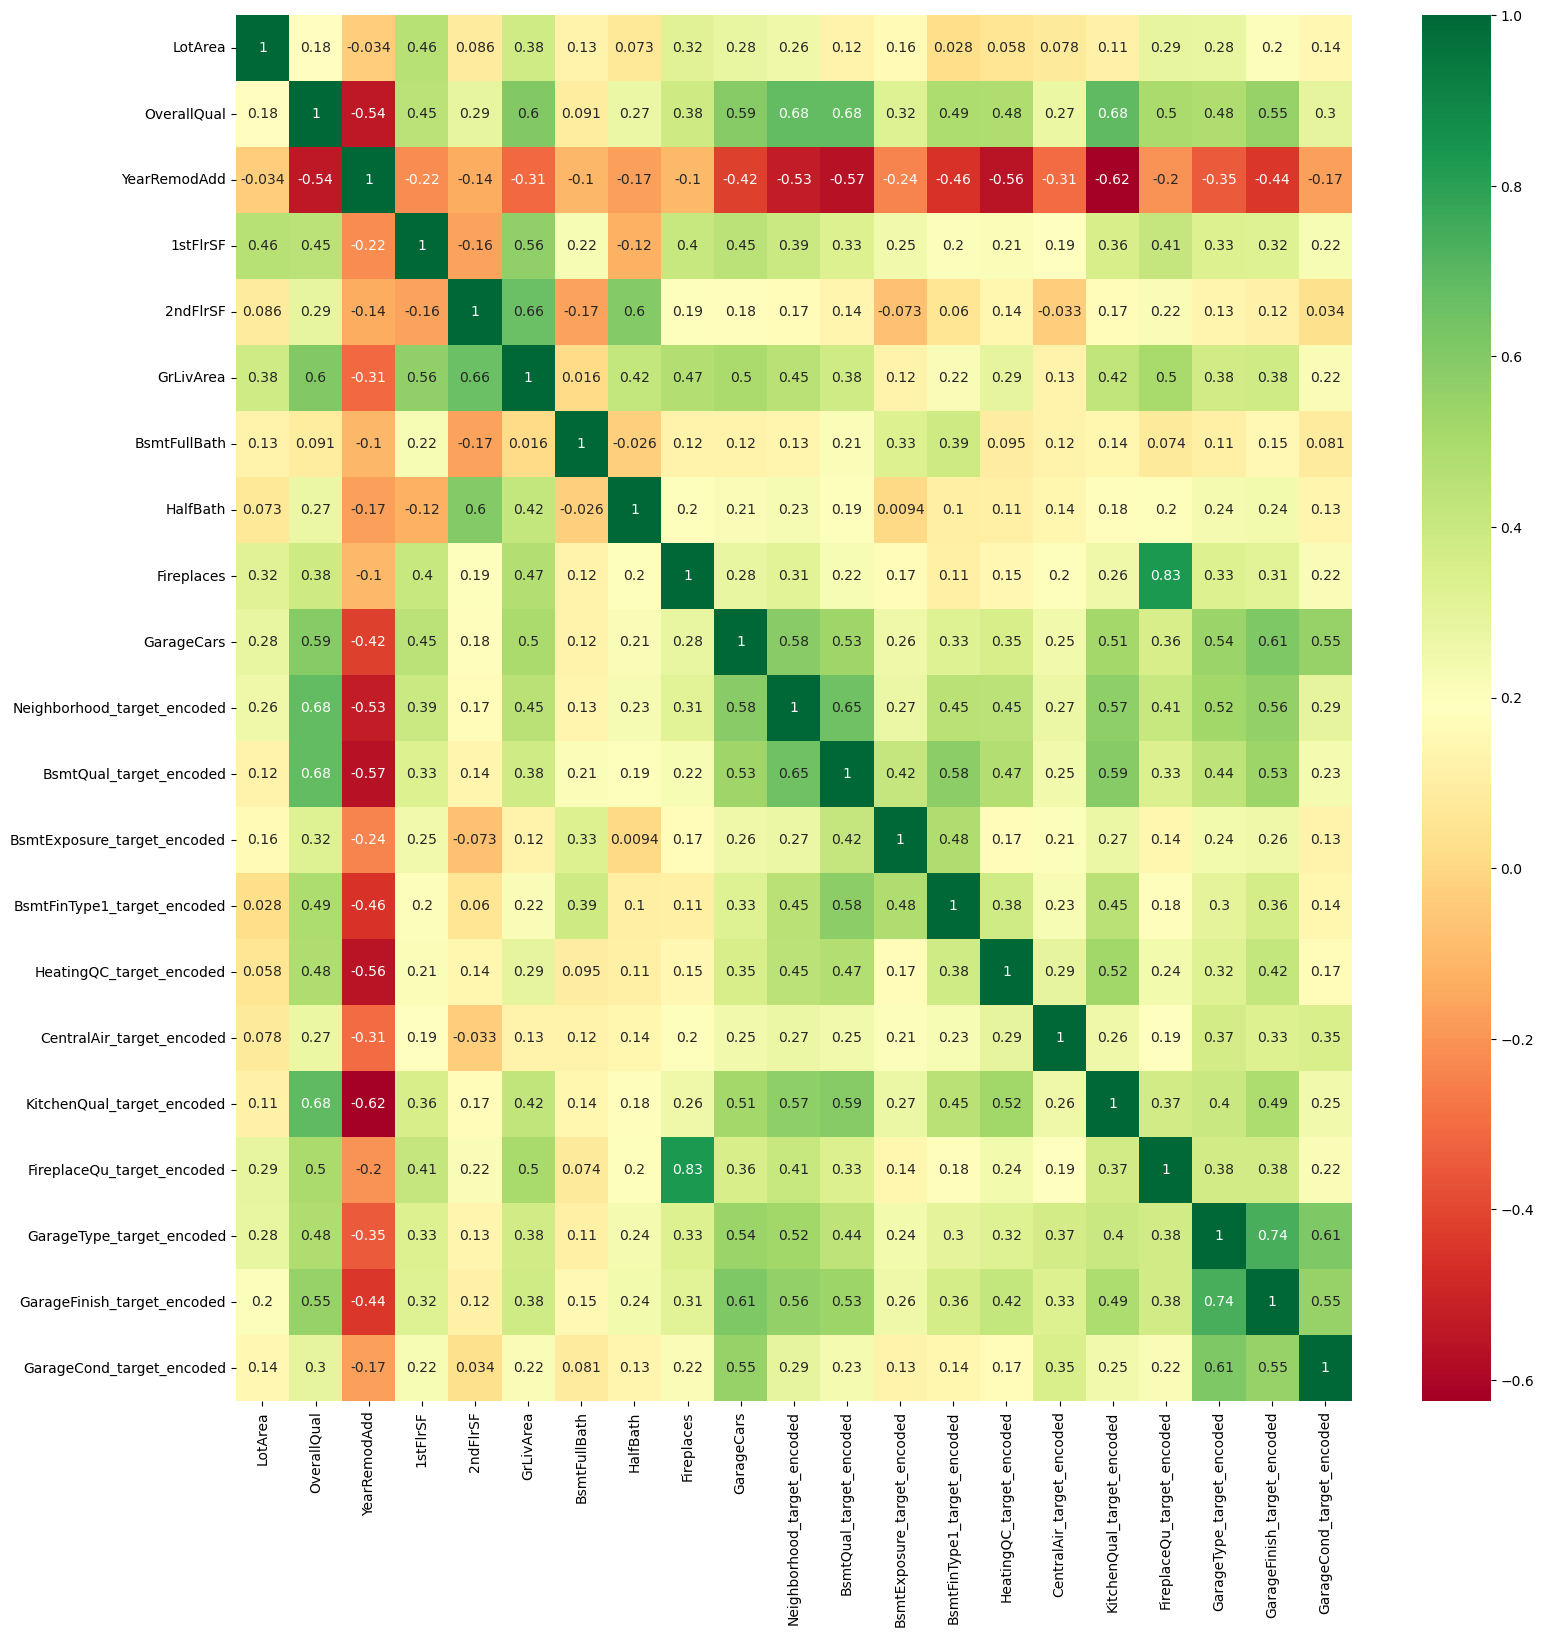

In [306]:
plt.figure(figsize=(18,18))
sns.heatmap(train_x.corr(),annot=True, cmap='RdYlGn')

# Model Creation

## 1. Linear Regression


In [307]:
lin_reg = LinearRegression()
lin_reg.fit(train_x,train_y)
y_pred = lin_reg.predict(test_x)

Coefficients of this model are not of much use as other model performs better than linear regression

In [308]:
coef_df = pd.DataFrame(lin_reg.coef_, test_x.columns, 
                       columns=['Coefficients'])
coef_df

,Coefficients
LotArea,0.193829
OverallQual,0.542696
YearRemodAdd,-0.079152
1stFlrSF,0.472715
2ndFlrSF,0.190986
GrLivArea,0.391283
BsmtFullBath,0.166829
HalfBath,0.063443
Fireplaces,0.051106
GarageCars,0.133770


In [309]:
linear_score = cross_val_score(lin_reg,test_x,test_y,cv=5)
print('Cross Val Score: ', linear_score.mean())
print('R2 score:',r2_score(test_y, y_pred))
print('Mean Absolute Error:', mean_absolute_error(test_y, y_pred))
print('Mean Squared Error:',mean_squared_error(test_y, y_pred))

linear_RMSE = np.sqrt(mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error:', linear_RMSE )


Cross Val Score:  0.8514532474491604
R2 score: -70727.79869364224
Mean Absolute Error: 81.06457163184632
Mean Squared Error: 13198.94996566769
Root Mean Squared Error: 114.88668315199848


## 2. Ridge Regression

In [313]:
kf = KFold(shuffle=True, random_state=0, n_splits=3)

estimator = Pipeline([("polynomial_features", PolynomialFeatures()),
                      ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': [1e-15,1e-10,1e-8,1e-3,0.005,1e-2,0.05,0.1,0.5,1,5,10,20,30,35,40]
}
# 'alpha':[1e-15,1e-10,1e-8,1e-3,0.005,1e-2,0.05,0.1,0.5,1,5,10,20,30,35,40]

grid = GridSearchCV(estimator, params, cv=kf)

grid.fit(train_x,train_y)
print('best score: {}'.format(grid.best_score_))
print('best score: {}'.format(grid.best_params_))


best score: 0.8775150675139174
best score: {'polynomial_features__degree': 1, 'ridge_regression__alpha': 1}


* Best value of alpha for Ridge is 1

In [314]:
ridge = Ridge(alpha=1)

ridge.fit(train_x,train_y)
y_pred = ridge.predict(test_x)

ridge_score = cross_val_score(ridge,test_x,test_y,cv=10)
print('Cross Val Score: ', ridge_score.mean())

ridge_RMSE = np.sqrt(mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error:', ridge_RMSE)



Cross Val Score:  0.8624164061770274
Root Mean Squared Error: 117.58985369764478


## 3. LASSO Regression

In [315]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,0.005,1e-2,0.05,0.1,0.5,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,cv=kf)

lasso_regressor.fit(x_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.001}
0.887466937961944


* Best value of alpha for Lasso is 0.001

In [316]:
lasso = Lasso(alpha=0.001)

lasso.fit(train_x,train_y)
y_pred = lasso.predict(test_x)

lasso_score = cross_val_score(lasso,test_x,test_y,cv=10)
print('Cross Val Score: ', lasso_score.mean())

lasso_RMSE = np.sqrt(mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error:', lasso_RMSE)


Cross Val Score:  0.8614677008882168
Root Mean Squared Error: 111.61991565478752


### Compare Linear/Ridge/Lasso

In [317]:
print('Linear Regression score: {} , RMSE: {}'.format(linear_score.mean(),linear_RMSE))
print('Ridge Regression score: {} , RMSE: {}'.format(ridge_score.mean(),ridge_RMSE))
print('Lasso Regression score: {} , RMSE: {}'.format(lasso_score.mean() ,lasso_RMSE))

Linear Regression score: 0.8514532474491604 , RMSE: 114.88668315199848
Ridge Regression score: 0.8624164061770274 , RMSE: 117.58985369764478
Lasso Regression score: 0.8614677008882168 , RMSE: 111.61991565478752


#### Lasso Regression performs better than Linear and Ridge Regression
* it has highest least RMSE

## 4. K-Nearest-Neighbour Regressor


Best K-value: 4


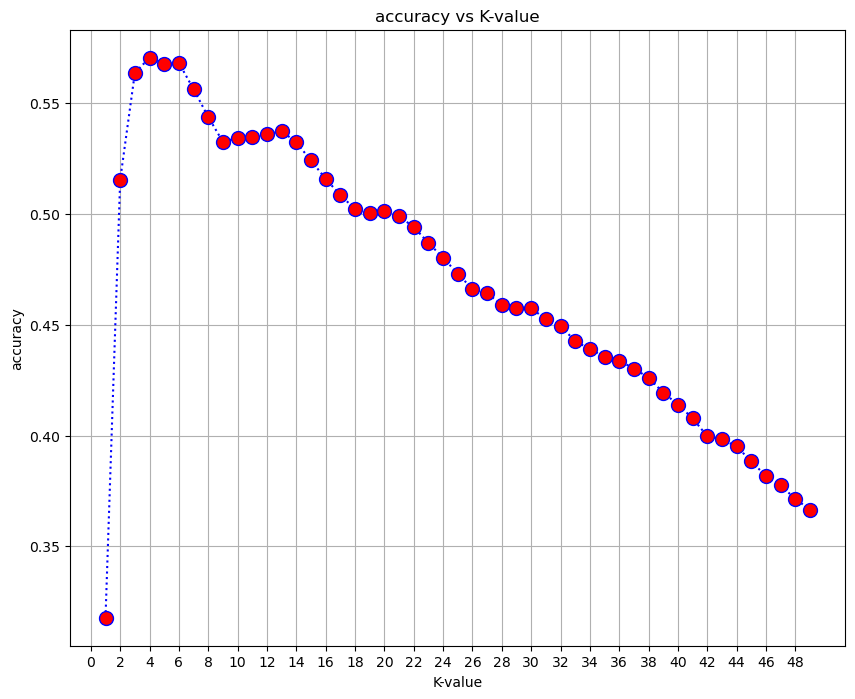

In [318]:
accuracy=[]
k=0
temp=0
for n in range(1,50):
    knn=KNeighborsRegressor(n_neighbors=n)
    result= cross_val_score(knn, test_x, test_y, cv=10)
    accuracy.append(result.mean())
    if (result.mean() > temp):
        temp=result.mean()
        k=n
    
    
plt.figure(figsize=(10,8))
axes = plt.axes()
axes.grid()
plt.plot(range(1,50), accuracy, color='blue', linestyle=':',
        marker='o', markerfacecolor='red',markersize=10 )
plt.title('accuracy vs K-value')
plt.xlabel('K-value')
plt.xticks(range(0,50,2))
plt.ylabel('accuracy')

print('Best K-value: {}'.format(k))

In [319]:
knn=KNeighborsRegressor(n_neighbors=4)
knn.fit(train_x,train_y)
y_pred = knn.predict(test_x)

knn_score = cross_val_score(knn,test_x,test_y,cv=10)
print('Cross Val Score: ', knn_score.mean())

knn_RMSE = np.sqrt(mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error:', knn_RMSE)



Cross Val Score:  0.5705402452274194
Root Mean Squared Error: 1.0929557551985574


## 5. SVM Regressor

In [320]:
svm_regressor = SVR()
parameters = {'kernel':['poly','rbf'] , 'degree':[2,3,4,5] }
svm_reg = GridSearchCV(svm_regressor,parameters,cv=kf)

svm_reg.fit(train_x,train_y)
print('Best Parameters: {}'.format(svm_reg.best_params_))
print('Best SCore: {}'.format(svm_reg.best_score_))

Best Parameters: {'degree': 2, 'kernel': 'rbf'}
Best SCore: 0.8736836496348248


In [321]:
svm_regressor = SVR(kernel='rbf', degree=2)
svm_regressor.fit(train_x,train_y)
y_pred = svm_regressor.predict(test_x)

SVM_score = cross_val_score(svm_regressor,test_x,test_y,cv=10)
print('Cross Val Score: ', SVM_score.mean())

SVM_RMSE = np.sqrt(mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error:', SVM_RMSE)

Cross Val Score:  0.36057408672513214
Root Mean Squared Error: 0.43237365072594414


## 6. Random Forest Regressor

In [322]:
rf = RandomForestRegressor()

In [323]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)] 

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [324]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

rf_random.fit(train_x,train_y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_es

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=700; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=700; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=700; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=700; total time=   0.6s
[CV] END max_depth=20, max_f

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time=   0.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time=   0.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time=   0.7s
[CV] END max_depth=25, max_feature

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   1.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=30, max_feat

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.3s
[CV] END max_depth=10, max_featu

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=900; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=900; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=900; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=900; total time=   0.7s
[CV] END max_depth=30, max_f

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

In [326]:
print(rf_random.best_params_)
print('score: {}' .format(rf_random.best_score_))

{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}
score: 0.8789611914909656


#### Best parameters for Random forest are :
* 'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15


In [327]:
rf = RandomForestRegressor(n_estimators=500, min_samples_split=2, 
                           min_samples_leaf=1, max_features='sqrt', 
                           max_depth=15)
rf.fit(train_x,train_y)
y_pred = rf.predict(test_x)

RF_score = cross_val_score(rf,test_x,test_y,cv=10)
print('Cross Val Score: ', RF_score.mean())

RF_RMSE = np.sqrt(mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error:', RF_RMSE)

Cross Val Score:  0.8678318620482329
Root Mean Squared Error: 1.0523043653900281


In [328]:
print('Linear Regression score: {} , RMSE: {}'.format(linear_score.mean(),linear_RMSE))
print('Ridge Regression score: {} , RMSE: {}'.format(ridge_score.mean(),ridge_RMSE))
print('Lasso Regression score: {} , RMSE: {}'.format(lasso_score.mean() ,lasso_RMSE))
print('KNN Regression score: {} , RMSE: {}'.format(knn_score.mean() ,knn_RMSE))
print('SVM Regression score: {} , RMSE: {}'.format(SVM_score.mean() ,SVM_RMSE))
print('Random Forest score: {} , RMSE: {}'.format(RF_score.mean() ,RF_RMSE))

Linear Regression score: 0.8514532474491604 , RMSE: 114.88668315199848
Ridge Regression score: 0.8624164061770274 , RMSE: 117.58985369764478
Lasso Regression score: 0.8614677008882168 , RMSE: 111.61991565478752
KNN Regression score: 0.5705402452274194 , RMSE: 1.0929557551985574
SVM Regression score: 0.36057408672513214 , RMSE: 0.43237365072594414
Random Forest score: 0.8678318620482329 , RMSE: 1.0523043653900281


### Random Forest Regressor performs best